In [1]:
# from google.colab import drive
# drive.mount('/content/drive')
%cd ./content/drive/MyDrive/Colab Notebooks
%cd ./drive/MyDrive/Colab\ Notebooks

!pip install --upgrade albumentations
!pip install --upgrade tqdm
!pip install pytorch-ignite
!pip install torchcontrib
import argparse
from argparse import Namespace

from tqdm import notebook

from utils import get_grad_norm, get_parameter_norm

import torch
import torch.nn as nn
import torch.optim as optim
from torchcontrib.optim import SWA

from trainer import Trainer
from cnn_model import ConvolutionalClassifier
from data_loader import get_loader
from model_loader import get_model

[Errno 2] No such file or directory: './content/drive/MyDrive/Colab Notebooks'
/content
/content/drive/MyDrive/Colab Notebooks
     |████████████████████████████████| 81kB 3.9MB/s 
     |████████████████████████████████| 37.6MB 1.2MB/s 
     |████████████████████████████████| 952kB 63.4MB/s 
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
  Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12
     |████████████████████████████████| 81kB 3.7MB/s 
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1
     |████████████████████████████████| 204kB 4.1MB/s 
  Created wheel for torchcontrib: filename=torchcontrib-0.0.2-cp37-none-any.whl size=7532 sha256=cffd28332255b0747c89d46cd9d981fe4a14bcccf0d09e37989e6daf4cf1956a
  Stored in directory: /root/.cache/pip/wheels/06/06/7b

In [ ]:
# %cd ./drive/MyDrive/Colab\ Notebooks
!nvidia-smi

In [2]:
from argparse import Namespace
from copy import deepcopy

config = {"train_ratio":0.8, "batch_size":8, "n_epochs":60, "verbose":2,
          "gpu_id":0 if torch.cuda.is_available() else 1, "model_fn":"keypointrcnn_resnet50e60-bs8-newalbu-res224-swa_lr5e-5.pth",
          "n_classes":48,
          "freeze":True, "use_pretrained":True, "model_name":"keypointrcnn_resnet50"}

config = Namespace(**config)

In [3]:
device = torch.device('cpu') if config.gpu_id < 0 else torch.device('cuda:%d' % config.gpu_id)

train_loader, valid_loader = get_loader(config)

print("Train:", len(train_loader.dataset))
print("Valid:", len(valid_loader.dataset))

model = get_model(config).to(device)
base_opt = optim.SGD(model.parameters(), lr=1e-4, momentum=0.9, weight_decay=5e-4)

optimizer = SWA(base_opt, swa_start=10, swa_freq=2, swa_lr=0.00005)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 
                                                      mode='max',
                                                      verbose=True,
                                                      patience=7,
                                                      factor=0.5)
crit = nn.MSELoss()

if config.verbose >= 2:
    # print(model)
    print(optimizer)
    print(crit)

trainer = Trainer(config)
trainer.train(model, crit, optimizer,  scheduler, train_loader, valid_loader)
optimizer.swap_swa_sgd()

Train: 3356
Valid: 839


Downloading: "https://download.pytorch.org/models/keypointrcnn_resnet50_fpn_coco-fc266e95.pth" to /root/.cache/torch/hub/checkpoints/keypointrcnn_resnet50_fpn_coco-fc266e95.pth


SWA (
Parameter Group 0
    dampening: 0
    lr: 0.0001
    momentum: 0.9
    n_avg: 0
    nesterov: False
    step_counter: 0
    weight_decay: 0.0005
)
MSELoss()


  0%|2                                                                                          | 1/420 [00:00…

Epoch    10: reducing learning rate of group 0 to 5.0000e-05.
Epoch    18: reducing learning rate of group 0 to 2.5000e-05.
Epoch    26: reducing learning rate of group 0 to 2.5000e-05.
Epoch    34: reducing learning rate of group 0 to 2.5000e-05.
Epoch    42: reducing learning rate of group 0 to 2.5000e-05.
Epoch    50: reducing learning rate of group 0 to 2.5000e-05.
Epoch    58: reducing learning rate of group 0 to 2.5000e-05.
Epoch    66: reducing learning rate of group 0 to 2.5000e-05.
Epoch    74: reducing learning rate of group 0 to 2.5000e-05.
Epoch    82: reducing learning rate of group 0 to 2.5000e-05.
Epoch    90: reducing learning rate of group 0 to 2.5000e-05.
Epoch    98: reducing learning rate of group 0 to 2.5000e-05.
Epoch   106: reducing learning rate of group 0 to 2.5000e-05.
Epoch   114: reducing learning rate of group 0 to 2.5000e-05.
Epoch   122: reducing learning rate of group 0 to 2.5000e-05.
Epoch   130: reducing learning rate of group 0 to 2.5000e-05.
Epoch   

  1%|8                                                                                          | 1/105 [00:00…

Validation - loss=1.3354e+03 accuracy=0.0000 best_loss=inf


  0%|2                                                                                          | 1/420 [00:00…

Epoch   426: reducing learning rate of group 0 to 2.5000e-05.
Epoch   434: reducing learning rate of group 0 to 2.5000e-05.
Epoch   442: reducing learning rate of group 0 to 2.5000e-05.
Epoch   450: reducing learning rate of group 0 to 2.5000e-05.
Epoch   458: reducing learning rate of group 0 to 2.5000e-05.
Epoch   466: reducing learning rate of group 0 to 2.5000e-05.
Epoch   474: reducing learning rate of group 0 to 2.5000e-05.
Epoch   482: reducing learning rate of group 0 to 2.5000e-05.
Epoch   490: reducing learning rate of group 0 to 2.5000e-05.
Epoch   498: reducing learning rate of group 0 to 2.5000e-05.
Epoch   506: reducing learning rate of group 0 to 2.5000e-05.
Epoch   514: reducing learning rate of group 0 to 2.5000e-05.
Epoch   522: reducing learning rate of group 0 to 2.5000e-05.
Epoch   530: reducing learning rate of group 0 to 2.5000e-05.
Epoch   538: reducing learning rate of group 0 to 2.5000e-05.
Epoch   546: reducing learning rate of group 0 to 2.5000e-05.
Epoch   

  1%|8                                                                                          | 1/105 [00:00…

Validation - loss=8.1713e+02 accuracy=0.0000 best_loss=1.3354e+03


  0%|2                                                                                          | 1/420 [00:00…

Epoch   842: reducing learning rate of group 0 to 2.5000e-05.
Epoch   850: reducing learning rate of group 0 to 2.5000e-05.
Epoch   858: reducing learning rate of group 0 to 2.5000e-05.
Epoch   866: reducing learning rate of group 0 to 2.5000e-05.
Epoch   874: reducing learning rate of group 0 to 2.5000e-05.
Epoch   882: reducing learning rate of group 0 to 2.5000e-05.
Epoch   890: reducing learning rate of group 0 to 2.5000e-05.
Epoch   898: reducing learning rate of group 0 to 2.5000e-05.
Epoch   906: reducing learning rate of group 0 to 2.5000e-05.
Epoch   914: reducing learning rate of group 0 to 2.5000e-05.
Epoch   922: reducing learning rate of group 0 to 2.5000e-05.
Epoch   930: reducing learning rate of group 0 to 2.5000e-05.
Epoch   938: reducing learning rate of group 0 to 2.5000e-05.
Epoch   946: reducing learning rate of group 0 to 2.5000e-05.
Epoch   954: reducing learning rate of group 0 to 2.5000e-05.
Epoch   962: reducing learning rate of group 0 to 2.5000e-05.
Epoch   

  1%|8                                                                                          | 1/105 [00:00…

Validation - loss=5.3951e+02 accuracy=0.0000 best_loss=8.1713e+02


  0%|2                                                                                          | 1/420 [00:00…

Epoch  1266: reducing learning rate of group 0 to 2.5000e-05.
Epoch  1274: reducing learning rate of group 0 to 2.5000e-05.
Epoch  1282: reducing learning rate of group 0 to 2.5000e-05.
Epoch  1290: reducing learning rate of group 0 to 2.5000e-05.
Epoch  1298: reducing learning rate of group 0 to 2.5000e-05.
Epoch  1306: reducing learning rate of group 0 to 2.5000e-05.
Epoch  1314: reducing learning rate of group 0 to 2.5000e-05.
Epoch  1322: reducing learning rate of group 0 to 2.5000e-05.
Epoch  1330: reducing learning rate of group 0 to 2.5000e-05.
Epoch  1338: reducing learning rate of group 0 to 2.5000e-05.
Epoch  1346: reducing learning rate of group 0 to 2.5000e-05.
Epoch  1354: reducing learning rate of group 0 to 2.5000e-05.
Epoch  1362: reducing learning rate of group 0 to 2.5000e-05.
Epoch  1370: reducing learning rate of group 0 to 2.5000e-05.
Epoch  1378: reducing learning rate of group 0 to 2.5000e-05.
Epoch  1386: reducing learning rate of group 0 to 2.5000e-05.
Epoch  1

  1%|8                                                                                          | 1/105 [00:00…

Validation - loss=2.4291e+02 accuracy=0.0000 best_loss=5.3951e+02


  0%|2                                                                                          | 1/420 [00:00…

Epoch  1682: reducing learning rate of group 0 to 2.5000e-05.
Epoch  1690: reducing learning rate of group 0 to 2.5000e-05.
Epoch  1698: reducing learning rate of group 0 to 2.5000e-05.
Epoch  1706: reducing learning rate of group 0 to 2.5000e-05.
Epoch  1714: reducing learning rate of group 0 to 2.5000e-05.
Epoch  1722: reducing learning rate of group 0 to 2.5000e-05.
Epoch  1730: reducing learning rate of group 0 to 2.5000e-05.
Epoch  1738: reducing learning rate of group 0 to 2.5000e-05.
Epoch  1746: reducing learning rate of group 0 to 2.5000e-05.
Epoch  1754: reducing learning rate of group 0 to 2.5000e-05.
Epoch  1762: reducing learning rate of group 0 to 2.5000e-05.
Epoch  1770: reducing learning rate of group 0 to 2.5000e-05.
Epoch  1778: reducing learning rate of group 0 to 2.5000e-05.
Epoch  1786: reducing learning rate of group 0 to 2.5000e-05.
Epoch  1794: reducing learning rate of group 0 to 2.5000e-05.
Epoch  1802: reducing learning rate of group 0 to 2.5000e-05.
Epoch  1

  1%|8                                                                                          | 1/105 [00:00…

Validation - loss=1.2898e+02 accuracy=0.0000 best_loss=2.4291e+02


  0%|2                                                                                          | 1/420 [00:00…

Epoch  2106: reducing learning rate of group 0 to 2.5000e-05.
Epoch  2114: reducing learning rate of group 0 to 2.5000e-05.
Epoch  2122: reducing learning rate of group 0 to 2.5000e-05.
Epoch  2130: reducing learning rate of group 0 to 2.5000e-05.
Epoch  2138: reducing learning rate of group 0 to 2.5000e-05.
Epoch  2146: reducing learning rate of group 0 to 2.5000e-05.
Epoch  2154: reducing learning rate of group 0 to 2.5000e-05.
Epoch  2162: reducing learning rate of group 0 to 2.5000e-05.
Epoch  2170: reducing learning rate of group 0 to 2.5000e-05.
Epoch  2178: reducing learning rate of group 0 to 2.5000e-05.
Epoch  2186: reducing learning rate of group 0 to 2.5000e-05.
Epoch  2194: reducing learning rate of group 0 to 2.5000e-05.
Epoch  2202: reducing learning rate of group 0 to 2.5000e-05.
Epoch  2210: reducing learning rate of group 0 to 2.5000e-05.
Epoch  2218: reducing learning rate of group 0 to 2.5000e-05.
Epoch  2226: reducing learning rate of group 0 to 2.5000e-05.
Epoch  2

  1%|8                                                                                          | 1/105 [00:00…

Validation - loss=9.4376e+01 accuracy=0.0000 best_loss=1.2898e+02


  0%|2                                                                                          | 1/420 [00:00…

Epoch  2522: reducing learning rate of group 0 to 2.5000e-05.
Epoch  2530: reducing learning rate of group 0 to 2.5000e-05.
Epoch  2538: reducing learning rate of group 0 to 2.5000e-05.
Epoch  2546: reducing learning rate of group 0 to 2.5000e-05.
Epoch  2554: reducing learning rate of group 0 to 2.5000e-05.
Epoch  2562: reducing learning rate of group 0 to 2.5000e-05.
Epoch  2570: reducing learning rate of group 0 to 2.5000e-05.
Epoch  2578: reducing learning rate of group 0 to 2.5000e-05.
Epoch  2586: reducing learning rate of group 0 to 2.5000e-05.
Epoch  2594: reducing learning rate of group 0 to 2.5000e-05.
Epoch  2602: reducing learning rate of group 0 to 2.5000e-05.
Epoch  2610: reducing learning rate of group 0 to 2.5000e-05.
Epoch  2618: reducing learning rate of group 0 to 2.5000e-05.
Epoch  2626: reducing learning rate of group 0 to 2.5000e-05.
Epoch  2634: reducing learning rate of group 0 to 2.5000e-05.
Epoch  2642: reducing learning rate of group 0 to 2.5000e-05.
Epoch  2

  1%|8                                                                                          | 1/105 [00:00…

Validation - loss=7.6731e+01 accuracy=0.0000 best_loss=9.4376e+01


  0%|2                                                                                          | 1/420 [00:00…

Epoch  2946: reducing learning rate of group 0 to 2.5000e-05.
Epoch  2954: reducing learning rate of group 0 to 2.5000e-05.
Epoch  2962: reducing learning rate of group 0 to 2.5000e-05.
Epoch  2970: reducing learning rate of group 0 to 2.5000e-05.
Epoch  2978: reducing learning rate of group 0 to 2.5000e-05.
Epoch  2986: reducing learning rate of group 0 to 2.5000e-05.
Epoch  2994: reducing learning rate of group 0 to 2.5000e-05.
Epoch  3002: reducing learning rate of group 0 to 2.5000e-05.
Epoch  3010: reducing learning rate of group 0 to 2.5000e-05.
Epoch  3018: reducing learning rate of group 0 to 2.5000e-05.
Epoch  3026: reducing learning rate of group 0 to 2.5000e-05.
Epoch  3034: reducing learning rate of group 0 to 2.5000e-05.
Epoch  3042: reducing learning rate of group 0 to 2.5000e-05.
Epoch  3050: reducing learning rate of group 0 to 2.5000e-05.
Epoch  3058: reducing learning rate of group 0 to 2.5000e-05.
Epoch  3066: reducing learning rate of group 0 to 2.5000e-05.
Epoch  3

  1%|8                                                                                          | 1/105 [00:00…

Validation - loss=6.8576e+01 accuracy=0.0000 best_loss=7.6731e+01


  0%|2                                                                                          | 1/420 [00:00…

Epoch  3362: reducing learning rate of group 0 to 2.5000e-05.
Epoch  3370: reducing learning rate of group 0 to 2.5000e-05.
Epoch  3378: reducing learning rate of group 0 to 2.5000e-05.
Epoch  3386: reducing learning rate of group 0 to 2.5000e-05.
Epoch  3394: reducing learning rate of group 0 to 2.5000e-05.
Epoch  3402: reducing learning rate of group 0 to 2.5000e-05.
Epoch  3410: reducing learning rate of group 0 to 2.5000e-05.
Epoch  3418: reducing learning rate of group 0 to 2.5000e-05.
Epoch  3426: reducing learning rate of group 0 to 2.5000e-05.
Epoch  3434: reducing learning rate of group 0 to 2.5000e-05.
Epoch  3442: reducing learning rate of group 0 to 2.5000e-05.
Epoch  3450: reducing learning rate of group 0 to 2.5000e-05.
Epoch  3458: reducing learning rate of group 0 to 2.5000e-05.
Epoch  3466: reducing learning rate of group 0 to 2.5000e-05.
Epoch  3474: reducing learning rate of group 0 to 2.5000e-05.
Epoch  3482: reducing learning rate of group 0 to 2.5000e-05.
Epoch  3

  1%|8                                                                                          | 1/105 [00:00…

Validation - loss=6.4467e+01 accuracy=0.0000 best_loss=6.8576e+01


  0%|2                                                                                          | 1/420 [00:00…

Epoch  3786: reducing learning rate of group 0 to 2.5000e-05.
Epoch  3794: reducing learning rate of group 0 to 2.5000e-05.
Epoch  3802: reducing learning rate of group 0 to 2.5000e-05.
Epoch  3810: reducing learning rate of group 0 to 2.5000e-05.
Epoch  3818: reducing learning rate of group 0 to 2.5000e-05.
Epoch  3826: reducing learning rate of group 0 to 2.5000e-05.
Epoch  3834: reducing learning rate of group 0 to 2.5000e-05.
Epoch  3842: reducing learning rate of group 0 to 2.5000e-05.
Epoch  3850: reducing learning rate of group 0 to 2.5000e-05.
Epoch  3858: reducing learning rate of group 0 to 2.5000e-05.
Epoch  3866: reducing learning rate of group 0 to 2.5000e-05.
Epoch  3874: reducing learning rate of group 0 to 2.5000e-05.
Epoch  3882: reducing learning rate of group 0 to 2.5000e-05.
Epoch  3890: reducing learning rate of group 0 to 2.5000e-05.
Epoch  3898: reducing learning rate of group 0 to 2.5000e-05.
Epoch  3906: reducing learning rate of group 0 to 2.5000e-05.
Epoch  3

  1%|8                                                                                          | 1/105 [00:00…

Validation - loss=5.8920e+01 accuracy=0.0000 best_loss=6.4467e+01


  0%|2                                                                                          | 1/420 [00:00…

Epoch  4202: reducing learning rate of group 0 to 2.5000e-05.
Epoch  4210: reducing learning rate of group 0 to 2.5000e-05.
Epoch  4218: reducing learning rate of group 0 to 2.5000e-05.
Epoch  4226: reducing learning rate of group 0 to 2.5000e-05.
Epoch  4234: reducing learning rate of group 0 to 2.5000e-05.
Epoch  4242: reducing learning rate of group 0 to 2.5000e-05.
Epoch  4250: reducing learning rate of group 0 to 2.5000e-05.
Epoch  4258: reducing learning rate of group 0 to 2.5000e-05.
Epoch  4266: reducing learning rate of group 0 to 2.5000e-05.
Epoch  4274: reducing learning rate of group 0 to 2.5000e-05.
Epoch  4282: reducing learning rate of group 0 to 2.5000e-05.
Epoch  4290: reducing learning rate of group 0 to 2.5000e-05.
Epoch  4298: reducing learning rate of group 0 to 2.5000e-05.
Epoch  4306: reducing learning rate of group 0 to 2.5000e-05.
Epoch  4314: reducing learning rate of group 0 to 2.5000e-05.
Epoch  4322: reducing learning rate of group 0 to 2.5000e-05.
Epoch  4

  1%|8                                                                                          | 1/105 [00:00…

Validation - loss=5.6594e+01 accuracy=0.0000 best_loss=5.8920e+01


  0%|2                                                                                          | 1/420 [00:00…

Epoch  4626: reducing learning rate of group 0 to 2.5000e-05.
Epoch  4634: reducing learning rate of group 0 to 2.5000e-05.
Epoch  4642: reducing learning rate of group 0 to 2.5000e-05.
Epoch  4650: reducing learning rate of group 0 to 2.5000e-05.
Epoch  4658: reducing learning rate of group 0 to 2.5000e-05.
Epoch  4666: reducing learning rate of group 0 to 2.5000e-05.
Epoch  4674: reducing learning rate of group 0 to 2.5000e-05.
Epoch  4682: reducing learning rate of group 0 to 2.5000e-05.
Epoch  4690: reducing learning rate of group 0 to 2.5000e-05.
Epoch  4698: reducing learning rate of group 0 to 2.5000e-05.
Epoch  4706: reducing learning rate of group 0 to 2.5000e-05.
Epoch  4714: reducing learning rate of group 0 to 2.5000e-05.
Epoch  4722: reducing learning rate of group 0 to 2.5000e-05.
Epoch  4730: reducing learning rate of group 0 to 2.5000e-05.
Epoch  4738: reducing learning rate of group 0 to 2.5000e-05.
Epoch  4746: reducing learning rate of group 0 to 2.5000e-05.
Epoch  4

  1%|8                                                                                          | 1/105 [00:00…

Validation - loss=5.5673e+01 accuracy=0.0000 best_loss=5.6594e+01


  0%|2                                                                                          | 1/420 [00:00…

Epoch  5042: reducing learning rate of group 0 to 2.5000e-05.
Epoch  5050: reducing learning rate of group 0 to 2.5000e-05.
Epoch  5058: reducing learning rate of group 0 to 2.5000e-05.
Epoch  5066: reducing learning rate of group 0 to 2.5000e-05.
Epoch  5074: reducing learning rate of group 0 to 2.5000e-05.
Epoch  5082: reducing learning rate of group 0 to 2.5000e-05.
Epoch  5090: reducing learning rate of group 0 to 2.5000e-05.
Epoch  5098: reducing learning rate of group 0 to 2.5000e-05.
Epoch  5106: reducing learning rate of group 0 to 2.5000e-05.
Epoch  5114: reducing learning rate of group 0 to 2.5000e-05.
Epoch  5122: reducing learning rate of group 0 to 2.5000e-05.
Epoch  5130: reducing learning rate of group 0 to 2.5000e-05.
Epoch  5138: reducing learning rate of group 0 to 2.5000e-05.
Epoch  5146: reducing learning rate of group 0 to 2.5000e-05.
Epoch  5154: reducing learning rate of group 0 to 2.5000e-05.
Epoch  5162: reducing learning rate of group 0 to 2.5000e-05.
Epoch  5

  1%|8                                                                                          | 1/105 [00:00…

Validation - loss=5.2375e+01 accuracy=0.0000 best_loss=5.5673e+01


  0%|2                                                                                          | 1/420 [00:00…

Epoch  5466: reducing learning rate of group 0 to 2.5000e-05.
Epoch  5474: reducing learning rate of group 0 to 2.5000e-05.
Epoch  5482: reducing learning rate of group 0 to 2.5000e-05.
Epoch  5490: reducing learning rate of group 0 to 2.5000e-05.
Epoch  5498: reducing learning rate of group 0 to 2.5000e-05.
Epoch  5506: reducing learning rate of group 0 to 2.5000e-05.
Epoch  5514: reducing learning rate of group 0 to 2.5000e-05.
Epoch  5522: reducing learning rate of group 0 to 2.5000e-05.
Epoch  5530: reducing learning rate of group 0 to 2.5000e-05.
Epoch  5538: reducing learning rate of group 0 to 2.5000e-05.
Epoch  5546: reducing learning rate of group 0 to 2.5000e-05.
Epoch  5554: reducing learning rate of group 0 to 2.5000e-05.
Epoch  5562: reducing learning rate of group 0 to 2.5000e-05.
Epoch  5570: reducing learning rate of group 0 to 2.5000e-05.
Epoch  5578: reducing learning rate of group 0 to 2.5000e-05.
Epoch  5586: reducing learning rate of group 0 to 2.5000e-05.
Epoch  5

  1%|8                                                                                          | 1/105 [00:00…

Validation - loss=5.1213e+01 accuracy=0.0000 best_loss=5.2375e+01


  0%|2                                                                                          | 1/420 [00:00…

Epoch  5882: reducing learning rate of group 0 to 2.5000e-05.
Epoch  5890: reducing learning rate of group 0 to 2.5000e-05.
Epoch  5898: reducing learning rate of group 0 to 2.5000e-05.
Epoch  5906: reducing learning rate of group 0 to 2.5000e-05.
Epoch  5914: reducing learning rate of group 0 to 2.5000e-05.
Epoch  5922: reducing learning rate of group 0 to 2.5000e-05.
Epoch  5930: reducing learning rate of group 0 to 2.5000e-05.
Epoch  5938: reducing learning rate of group 0 to 2.5000e-05.
Epoch  5946: reducing learning rate of group 0 to 2.5000e-05.
Epoch  5954: reducing learning rate of group 0 to 2.5000e-05.
Epoch  5962: reducing learning rate of group 0 to 2.5000e-05.
Epoch  5970: reducing learning rate of group 0 to 2.5000e-05.
Epoch  5978: reducing learning rate of group 0 to 2.5000e-05.
Epoch  5986: reducing learning rate of group 0 to 2.5000e-05.
Epoch  5994: reducing learning rate of group 0 to 2.5000e-05.
Epoch  6002: reducing learning rate of group 0 to 2.5000e-05.
Epoch  6

  1%|8                                                                                          | 1/105 [00:00…

Validation - loss=5.1601e+01 accuracy=0.0000 best_loss=5.1213e+01


  0%|2                                                                                          | 1/420 [00:00…

Epoch  6306: reducing learning rate of group 0 to 2.5000e-05.
Epoch  6314: reducing learning rate of group 0 to 2.5000e-05.
Epoch  6322: reducing learning rate of group 0 to 2.5000e-05.
Epoch  6330: reducing learning rate of group 0 to 2.5000e-05.
Epoch  6338: reducing learning rate of group 0 to 2.5000e-05.
Epoch  6346: reducing learning rate of group 0 to 2.5000e-05.
Epoch  6354: reducing learning rate of group 0 to 2.5000e-05.
Epoch  6362: reducing learning rate of group 0 to 2.5000e-05.
Epoch  6370: reducing learning rate of group 0 to 2.5000e-05.
Epoch  6378: reducing learning rate of group 0 to 2.5000e-05.
Epoch  6386: reducing learning rate of group 0 to 2.5000e-05.
Epoch  6394: reducing learning rate of group 0 to 2.5000e-05.
Epoch  6402: reducing learning rate of group 0 to 2.5000e-05.
Epoch  6410: reducing learning rate of group 0 to 2.5000e-05.
Epoch  6418: reducing learning rate of group 0 to 2.5000e-05.
Epoch  6426: reducing learning rate of group 0 to 2.5000e-05.
Epoch  6

  1%|8                                                                                          | 1/105 [00:00…

Validation - loss=5.0119e+01 accuracy=0.0000 best_loss=5.1213e+01


  0%|2                                                                                          | 1/420 [00:00…

Epoch  6722: reducing learning rate of group 0 to 2.5000e-05.
Epoch  6730: reducing learning rate of group 0 to 2.5000e-05.
Epoch  6738: reducing learning rate of group 0 to 2.5000e-05.
Epoch  6746: reducing learning rate of group 0 to 2.5000e-05.
Epoch  6754: reducing learning rate of group 0 to 2.5000e-05.
Epoch  6762: reducing learning rate of group 0 to 2.5000e-05.
Epoch  6770: reducing learning rate of group 0 to 2.5000e-05.
Epoch  6778: reducing learning rate of group 0 to 2.5000e-05.
Epoch  6786: reducing learning rate of group 0 to 2.5000e-05.
Epoch  6794: reducing learning rate of group 0 to 2.5000e-05.
Epoch  6802: reducing learning rate of group 0 to 2.5000e-05.
Epoch  6810: reducing learning rate of group 0 to 2.5000e-05.
Epoch  6818: reducing learning rate of group 0 to 2.5000e-05.
Epoch  6826: reducing learning rate of group 0 to 2.5000e-05.
Epoch  6834: reducing learning rate of group 0 to 2.5000e-05.
Epoch  6842: reducing learning rate of group 0 to 2.5000e-05.
Epoch  6

  1%|8                                                                                          | 1/105 [00:00…

Validation - loss=4.8071e+01 accuracy=0.0000 best_loss=5.0119e+01


  0%|2                                                                                          | 1/420 [00:00…

Epoch  7146: reducing learning rate of group 0 to 2.5000e-05.
Epoch  7154: reducing learning rate of group 0 to 2.5000e-05.
Epoch  7162: reducing learning rate of group 0 to 2.5000e-05.
Epoch  7170: reducing learning rate of group 0 to 2.5000e-05.
Epoch  7178: reducing learning rate of group 0 to 2.5000e-05.
Epoch  7186: reducing learning rate of group 0 to 2.5000e-05.
Epoch  7194: reducing learning rate of group 0 to 2.5000e-05.
Epoch  7202: reducing learning rate of group 0 to 2.5000e-05.
Epoch  7210: reducing learning rate of group 0 to 2.5000e-05.
Epoch  7218: reducing learning rate of group 0 to 2.5000e-05.
Epoch  7226: reducing learning rate of group 0 to 2.5000e-05.
Epoch  7234: reducing learning rate of group 0 to 2.5000e-05.
Epoch  7242: reducing learning rate of group 0 to 2.5000e-05.
Epoch  7250: reducing learning rate of group 0 to 2.5000e-05.
Epoch  7258: reducing learning rate of group 0 to 2.5000e-05.
Epoch  7266: reducing learning rate of group 0 to 2.5000e-05.
Epoch  7

  1%|8                                                                                          | 1/105 [00:00…

Validation - loss=4.7134e+01 accuracy=0.0000 best_loss=4.8071e+01


  0%|2                                                                                          | 1/420 [00:00…

Epoch  7562: reducing learning rate of group 0 to 2.5000e-05.
Epoch  7570: reducing learning rate of group 0 to 2.5000e-05.
Epoch  7578: reducing learning rate of group 0 to 2.5000e-05.
Epoch  7586: reducing learning rate of group 0 to 2.5000e-05.
Epoch  7594: reducing learning rate of group 0 to 2.5000e-05.
Epoch  7602: reducing learning rate of group 0 to 2.5000e-05.
Epoch  7610: reducing learning rate of group 0 to 2.5000e-05.
Epoch  7618: reducing learning rate of group 0 to 2.5000e-05.
Epoch  7626: reducing learning rate of group 0 to 2.5000e-05.
Epoch  7634: reducing learning rate of group 0 to 2.5000e-05.
Epoch  7642: reducing learning rate of group 0 to 2.5000e-05.
Epoch  7650: reducing learning rate of group 0 to 2.5000e-05.
Epoch  7658: reducing learning rate of group 0 to 2.5000e-05.
Epoch  7666: reducing learning rate of group 0 to 2.5000e-05.
Epoch  7674: reducing learning rate of group 0 to 2.5000e-05.
Epoch  7682: reducing learning rate of group 0 to 2.5000e-05.
Epoch  7

  1%|8                                                                                          | 1/105 [00:00…

Validation - loss=4.6437e+01 accuracy=0.0000 best_loss=4.7134e+01


  0%|2                                                                                          | 1/420 [00:00…

Epoch  7986: reducing learning rate of group 0 to 2.5000e-05.
Epoch  7994: reducing learning rate of group 0 to 2.5000e-05.
Epoch  8002: reducing learning rate of group 0 to 2.5000e-05.
Epoch  8010: reducing learning rate of group 0 to 2.5000e-05.
Epoch  8018: reducing learning rate of group 0 to 2.5000e-05.
Epoch  8026: reducing learning rate of group 0 to 2.5000e-05.
Epoch  8034: reducing learning rate of group 0 to 2.5000e-05.
Epoch  8042: reducing learning rate of group 0 to 2.5000e-05.
Epoch  8050: reducing learning rate of group 0 to 2.5000e-05.
Epoch  8058: reducing learning rate of group 0 to 2.5000e-05.
Epoch  8066: reducing learning rate of group 0 to 2.5000e-05.
Epoch  8074: reducing learning rate of group 0 to 2.5000e-05.
Epoch  8082: reducing learning rate of group 0 to 2.5000e-05.
Epoch  8090: reducing learning rate of group 0 to 2.5000e-05.
Epoch  8098: reducing learning rate of group 0 to 2.5000e-05.
Epoch  8106: reducing learning rate of group 0 to 2.5000e-05.
Epoch  8

  1%|8                                                                                          | 1/105 [00:00…

Validation - loss=4.5095e+01 accuracy=0.0000 best_loss=4.6437e+01


  0%|2                                                                                          | 1/420 [00:00…

Epoch  8402: reducing learning rate of group 0 to 2.5000e-05.
Epoch  8410: reducing learning rate of group 0 to 2.5000e-05.
Epoch  8418: reducing learning rate of group 0 to 2.5000e-05.
Epoch  8426: reducing learning rate of group 0 to 2.5000e-05.
Epoch  8434: reducing learning rate of group 0 to 2.5000e-05.
Epoch  8442: reducing learning rate of group 0 to 2.5000e-05.
Epoch  8450: reducing learning rate of group 0 to 2.5000e-05.
Epoch  8458: reducing learning rate of group 0 to 2.5000e-05.
Epoch  8466: reducing learning rate of group 0 to 2.5000e-05.
Epoch  8474: reducing learning rate of group 0 to 2.5000e-05.
Epoch  8482: reducing learning rate of group 0 to 2.5000e-05.
Epoch  8490: reducing learning rate of group 0 to 2.5000e-05.
Epoch  8498: reducing learning rate of group 0 to 2.5000e-05.
Epoch  8506: reducing learning rate of group 0 to 2.5000e-05.
Epoch  8514: reducing learning rate of group 0 to 2.5000e-05.
Epoch  8522: reducing learning rate of group 0 to 2.5000e-05.
Epoch  8

  1%|8                                                                                          | 1/105 [00:00…

Validation - loss=4.5549e+01 accuracy=0.0000 best_loss=4.5095e+01


  0%|2                                                                                          | 1/420 [00:00…

Epoch  8826: reducing learning rate of group 0 to 2.5000e-05.
Epoch  8834: reducing learning rate of group 0 to 2.5000e-05.
Epoch  8842: reducing learning rate of group 0 to 2.5000e-05.
Epoch  8850: reducing learning rate of group 0 to 2.5000e-05.
Epoch  8858: reducing learning rate of group 0 to 2.5000e-05.
Epoch  8866: reducing learning rate of group 0 to 2.5000e-05.
Epoch  8874: reducing learning rate of group 0 to 2.5000e-05.
Epoch  8882: reducing learning rate of group 0 to 2.5000e-05.
Epoch  8890: reducing learning rate of group 0 to 2.5000e-05.
Epoch  8898: reducing learning rate of group 0 to 2.5000e-05.
Epoch  8906: reducing learning rate of group 0 to 2.5000e-05.
Epoch  8914: reducing learning rate of group 0 to 2.5000e-05.
Epoch  8922: reducing learning rate of group 0 to 2.5000e-05.
Epoch  8930: reducing learning rate of group 0 to 2.5000e-05.
Epoch  8938: reducing learning rate of group 0 to 2.5000e-05.
Epoch  8946: reducing learning rate of group 0 to 2.5000e-05.
Epoch  8

  1%|8                                                                                          | 1/105 [00:00…

Validation - loss=4.4290e+01 accuracy=0.0000 best_loss=4.5095e+01


  0%|2                                                                                          | 1/420 [00:00…

Epoch  9242: reducing learning rate of group 0 to 2.5000e-05.
Epoch  9250: reducing learning rate of group 0 to 2.5000e-05.
Epoch  9258: reducing learning rate of group 0 to 2.5000e-05.
Epoch  9266: reducing learning rate of group 0 to 2.5000e-05.
Epoch  9274: reducing learning rate of group 0 to 2.5000e-05.
Epoch  9282: reducing learning rate of group 0 to 2.5000e-05.
Epoch  9290: reducing learning rate of group 0 to 2.5000e-05.
Epoch  9298: reducing learning rate of group 0 to 2.5000e-05.
Epoch  9306: reducing learning rate of group 0 to 2.5000e-05.
Epoch  9314: reducing learning rate of group 0 to 2.5000e-05.
Epoch  9322: reducing learning rate of group 0 to 2.5000e-05.
Epoch  9330: reducing learning rate of group 0 to 2.5000e-05.
Epoch  9338: reducing learning rate of group 0 to 2.5000e-05.
Epoch  9346: reducing learning rate of group 0 to 2.5000e-05.
Epoch  9354: reducing learning rate of group 0 to 2.5000e-05.
Epoch  9362: reducing learning rate of group 0 to 2.5000e-05.
Epoch  9

  1%|8                                                                                          | 1/105 [00:00…

Validation - loss=4.5381e+01 accuracy=0.0000 best_loss=4.4290e+01


  0%|2                                                                                          | 1/420 [00:00…

Epoch  9666: reducing learning rate of group 0 to 2.5000e-05.
Epoch  9674: reducing learning rate of group 0 to 2.5000e-05.
Epoch  9682: reducing learning rate of group 0 to 2.5000e-05.
Epoch  9690: reducing learning rate of group 0 to 2.5000e-05.
Epoch  9698: reducing learning rate of group 0 to 2.5000e-05.
Epoch  9706: reducing learning rate of group 0 to 2.5000e-05.
Epoch  9714: reducing learning rate of group 0 to 2.5000e-05.
Epoch  9722: reducing learning rate of group 0 to 2.5000e-05.
Epoch  9730: reducing learning rate of group 0 to 2.5000e-05.
Epoch  9738: reducing learning rate of group 0 to 2.5000e-05.
Epoch  9746: reducing learning rate of group 0 to 2.5000e-05.
Epoch  9754: reducing learning rate of group 0 to 2.5000e-05.
Epoch  9762: reducing learning rate of group 0 to 2.5000e-05.
Epoch  9770: reducing learning rate of group 0 to 2.5000e-05.
Epoch  9778: reducing learning rate of group 0 to 2.5000e-05.
Epoch  9786: reducing learning rate of group 0 to 2.5000e-05.
Epoch  9

  1%|8                                                                                          | 1/105 [00:00…

Validation - loss=4.2349e+01 accuracy=0.0000 best_loss=4.4290e+01


  0%|2                                                                                          | 1/420 [00:00…

Epoch 10082: reducing learning rate of group 0 to 2.5000e-05.
Epoch 10090: reducing learning rate of group 0 to 2.5000e-05.
Epoch 10098: reducing learning rate of group 0 to 2.5000e-05.
Epoch 10106: reducing learning rate of group 0 to 2.5000e-05.
Epoch 10114: reducing learning rate of group 0 to 2.5000e-05.
Epoch 10122: reducing learning rate of group 0 to 2.5000e-05.
Epoch 10130: reducing learning rate of group 0 to 2.5000e-05.
Epoch 10138: reducing learning rate of group 0 to 2.5000e-05.
Epoch 10146: reducing learning rate of group 0 to 2.5000e-05.
Epoch 10154: reducing learning rate of group 0 to 2.5000e-05.
Epoch 10162: reducing learning rate of group 0 to 2.5000e-05.
Epoch 10170: reducing learning rate of group 0 to 2.5000e-05.
Epoch 10178: reducing learning rate of group 0 to 2.5000e-05.
Epoch 10186: reducing learning rate of group 0 to 2.5000e-05.
Epoch 10194: reducing learning rate of group 0 to 2.5000e-05.
Epoch 10202: reducing learning rate of group 0 to 2.5000e-05.
Epoch 10

  1%|8                                                                                          | 1/105 [00:00…

Validation - loss=4.2088e+01 accuracy=0.0000 best_loss=4.2349e+01


  0%|2                                                                                          | 1/420 [00:00…

Epoch 10506: reducing learning rate of group 0 to 2.5000e-05.
Epoch 10514: reducing learning rate of group 0 to 2.5000e-05.
Epoch 10522: reducing learning rate of group 0 to 2.5000e-05.
Epoch 10530: reducing learning rate of group 0 to 2.5000e-05.
Epoch 10538: reducing learning rate of group 0 to 2.5000e-05.
Epoch 10546: reducing learning rate of group 0 to 2.5000e-05.
Epoch 10554: reducing learning rate of group 0 to 2.5000e-05.
Epoch 10562: reducing learning rate of group 0 to 2.5000e-05.
Epoch 10570: reducing learning rate of group 0 to 2.5000e-05.
Epoch 10578: reducing learning rate of group 0 to 2.5000e-05.
Epoch 10586: reducing learning rate of group 0 to 2.5000e-05.
Epoch 10594: reducing learning rate of group 0 to 2.5000e-05.
Epoch 10602: reducing learning rate of group 0 to 2.5000e-05.
Epoch 10610: reducing learning rate of group 0 to 2.5000e-05.
Epoch 10618: reducing learning rate of group 0 to 2.5000e-05.
Epoch 10626: reducing learning rate of group 0 to 2.5000e-05.
Epoch 10

  1%|8                                                                                          | 1/105 [00:00…

Validation - loss=4.1656e+01 accuracy=0.0000 best_loss=4.2088e+01


  0%|2                                                                                          | 1/420 [00:00…

Epoch 10922: reducing learning rate of group 0 to 2.5000e-05.
Epoch 10930: reducing learning rate of group 0 to 2.5000e-05.
Epoch 10938: reducing learning rate of group 0 to 2.5000e-05.
Epoch 10946: reducing learning rate of group 0 to 2.5000e-05.
Epoch 10954: reducing learning rate of group 0 to 2.5000e-05.
Epoch 10962: reducing learning rate of group 0 to 2.5000e-05.
Epoch 10970: reducing learning rate of group 0 to 2.5000e-05.
Epoch 10978: reducing learning rate of group 0 to 2.5000e-05.
Epoch 10986: reducing learning rate of group 0 to 2.5000e-05.
Epoch 10994: reducing learning rate of group 0 to 2.5000e-05.
Epoch 11002: reducing learning rate of group 0 to 2.5000e-05.
Epoch 11010: reducing learning rate of group 0 to 2.5000e-05.
Epoch 11018: reducing learning rate of group 0 to 2.5000e-05.
Epoch 11026: reducing learning rate of group 0 to 2.5000e-05.
Epoch 11034: reducing learning rate of group 0 to 2.5000e-05.
Epoch 11042: reducing learning rate of group 0 to 2.5000e-05.
Epoch 11

  1%|8                                                                                          | 1/105 [00:00…

Validation - loss=4.2154e+01 accuracy=0.0000 best_loss=4.1656e+01


  0%|2                                                                                          | 1/420 [00:00…

Epoch 11346: reducing learning rate of group 0 to 2.5000e-05.
Epoch 11354: reducing learning rate of group 0 to 2.5000e-05.
Epoch 11362: reducing learning rate of group 0 to 2.5000e-05.
Epoch 11370: reducing learning rate of group 0 to 2.5000e-05.
Epoch 11378: reducing learning rate of group 0 to 2.5000e-05.
Epoch 11386: reducing learning rate of group 0 to 2.5000e-05.
Epoch 11394: reducing learning rate of group 0 to 2.5000e-05.
Epoch 11402: reducing learning rate of group 0 to 2.5000e-05.
Epoch 11410: reducing learning rate of group 0 to 2.5000e-05.
Epoch 11418: reducing learning rate of group 0 to 2.5000e-05.
Epoch 11426: reducing learning rate of group 0 to 2.5000e-05.
Epoch 11434: reducing learning rate of group 0 to 2.5000e-05.
Epoch 11442: reducing learning rate of group 0 to 2.5000e-05.
Epoch 11450: reducing learning rate of group 0 to 2.5000e-05.
Epoch 11458: reducing learning rate of group 0 to 2.5000e-05.
Epoch 11466: reducing learning rate of group 0 to 2.5000e-05.
Epoch 11

  1%|8                                                                                          | 1/105 [00:00…

Validation - loss=4.2202e+01 accuracy=0.0000 best_loss=4.1656e+01


  0%|2                                                                                          | 1/420 [00:00…

Epoch 11762: reducing learning rate of group 0 to 2.5000e-05.
Epoch 11770: reducing learning rate of group 0 to 2.5000e-05.
Epoch 11778: reducing learning rate of group 0 to 2.5000e-05.
Epoch 11786: reducing learning rate of group 0 to 2.5000e-05.
Epoch 11794: reducing learning rate of group 0 to 2.5000e-05.
Epoch 11802: reducing learning rate of group 0 to 2.5000e-05.
Epoch 11810: reducing learning rate of group 0 to 2.5000e-05.
Epoch 11818: reducing learning rate of group 0 to 2.5000e-05.
Epoch 11826: reducing learning rate of group 0 to 2.5000e-05.
Epoch 11834: reducing learning rate of group 0 to 2.5000e-05.
Epoch 11842: reducing learning rate of group 0 to 2.5000e-05.
Epoch 11850: reducing learning rate of group 0 to 2.5000e-05.
Epoch 11858: reducing learning rate of group 0 to 2.5000e-05.
Epoch 11866: reducing learning rate of group 0 to 2.5000e-05.
Epoch 11874: reducing learning rate of group 0 to 2.5000e-05.
Epoch 11882: reducing learning rate of group 0 to 2.5000e-05.
Epoch 11

  1%|8                                                                                          | 1/105 [00:00…

Validation - loss=3.9270e+01 accuracy=0.0000 best_loss=4.1656e+01


  0%|2                                                                                          | 1/420 [00:00…

Epoch 12186: reducing learning rate of group 0 to 2.5000e-05.
Epoch 12194: reducing learning rate of group 0 to 2.5000e-05.
Epoch 12202: reducing learning rate of group 0 to 2.5000e-05.
Epoch 12210: reducing learning rate of group 0 to 2.5000e-05.
Epoch 12218: reducing learning rate of group 0 to 2.5000e-05.
Epoch 12226: reducing learning rate of group 0 to 2.5000e-05.
Epoch 12234: reducing learning rate of group 0 to 2.5000e-05.
Epoch 12242: reducing learning rate of group 0 to 2.5000e-05.
Epoch 12250: reducing learning rate of group 0 to 2.5000e-05.
Epoch 12258: reducing learning rate of group 0 to 2.5000e-05.
Epoch 12266: reducing learning rate of group 0 to 2.5000e-05.
Epoch 12274: reducing learning rate of group 0 to 2.5000e-05.
Epoch 12282: reducing learning rate of group 0 to 2.5000e-05.
Epoch 12290: reducing learning rate of group 0 to 2.5000e-05.
Epoch 12298: reducing learning rate of group 0 to 2.5000e-05.
Epoch 12306: reducing learning rate of group 0 to 2.5000e-05.
Epoch 12

  1%|8                                                                                          | 1/105 [00:00…

Validation - loss=4.1566e+01 accuracy=0.0000 best_loss=3.9270e+01


  0%|2                                                                                          | 1/420 [00:00…

Epoch 12602: reducing learning rate of group 0 to 2.5000e-05.
Epoch 12610: reducing learning rate of group 0 to 2.5000e-05.
Epoch 12618: reducing learning rate of group 0 to 2.5000e-05.
Epoch 12626: reducing learning rate of group 0 to 2.5000e-05.
Epoch 12634: reducing learning rate of group 0 to 2.5000e-05.
Epoch 12642: reducing learning rate of group 0 to 2.5000e-05.
Epoch 12650: reducing learning rate of group 0 to 2.5000e-05.
Epoch 12658: reducing learning rate of group 0 to 2.5000e-05.
Epoch 12666: reducing learning rate of group 0 to 2.5000e-05.
Epoch 12674: reducing learning rate of group 0 to 2.5000e-05.
Epoch 12682: reducing learning rate of group 0 to 2.5000e-05.
Epoch 12690: reducing learning rate of group 0 to 2.5000e-05.
Epoch 12698: reducing learning rate of group 0 to 2.5000e-05.
Epoch 12706: reducing learning rate of group 0 to 2.5000e-05.
Epoch 12714: reducing learning rate of group 0 to 2.5000e-05.
Epoch 12722: reducing learning rate of group 0 to 2.5000e-05.
Epoch 12

  1%|8                                                                                          | 1/105 [00:00…

Validation - loss=3.9298e+01 accuracy=0.0000 best_loss=3.9270e+01


  0%|2                                                                                          | 1/420 [00:00…

Epoch 13026: reducing learning rate of group 0 to 2.5000e-05.
Epoch 13034: reducing learning rate of group 0 to 2.5000e-05.
Epoch 13042: reducing learning rate of group 0 to 2.5000e-05.
Epoch 13050: reducing learning rate of group 0 to 2.5000e-05.
Epoch 13058: reducing learning rate of group 0 to 2.5000e-05.
Epoch 13066: reducing learning rate of group 0 to 2.5000e-05.
Epoch 13074: reducing learning rate of group 0 to 2.5000e-05.
Epoch 13082: reducing learning rate of group 0 to 2.5000e-05.
Epoch 13090: reducing learning rate of group 0 to 2.5000e-05.
Epoch 13098: reducing learning rate of group 0 to 2.5000e-05.
Epoch 13106: reducing learning rate of group 0 to 2.5000e-05.
Epoch 13114: reducing learning rate of group 0 to 2.5000e-05.
Epoch 13122: reducing learning rate of group 0 to 2.5000e-05.
Epoch 13130: reducing learning rate of group 0 to 2.5000e-05.
Epoch 13138: reducing learning rate of group 0 to 2.5000e-05.
Epoch 13146: reducing learning rate of group 0 to 2.5000e-05.
Epoch 13

  1%|8                                                                                          | 1/105 [00:00…

Validation - loss=4.0519e+01 accuracy=0.0000 best_loss=3.9270e+01


  0%|2                                                                                          | 1/420 [00:00…

Epoch 13442: reducing learning rate of group 0 to 2.5000e-05.
Epoch 13450: reducing learning rate of group 0 to 2.5000e-05.
Epoch 13458: reducing learning rate of group 0 to 2.5000e-05.
Epoch 13466: reducing learning rate of group 0 to 2.5000e-05.
Epoch 13474: reducing learning rate of group 0 to 2.5000e-05.
Epoch 13482: reducing learning rate of group 0 to 2.5000e-05.
Epoch 13490: reducing learning rate of group 0 to 2.5000e-05.
Epoch 13498: reducing learning rate of group 0 to 2.5000e-05.
Epoch 13506: reducing learning rate of group 0 to 2.5000e-05.
Epoch 13514: reducing learning rate of group 0 to 2.5000e-05.
Epoch 13522: reducing learning rate of group 0 to 2.5000e-05.
Epoch 13530: reducing learning rate of group 0 to 2.5000e-05.
Epoch 13538: reducing learning rate of group 0 to 2.5000e-05.
Epoch 13546: reducing learning rate of group 0 to 2.5000e-05.
Epoch 13554: reducing learning rate of group 0 to 2.5000e-05.
Epoch 13562: reducing learning rate of group 0 to 2.5000e-05.
Epoch 13

  1%|8                                                                                          | 1/105 [00:00…

Validation - loss=3.8330e+01 accuracy=0.0000 best_loss=3.9270e+01


  0%|2                                                                                          | 1/420 [00:00…

Epoch 13866: reducing learning rate of group 0 to 2.5000e-05.
Epoch 13874: reducing learning rate of group 0 to 2.5000e-05.
Epoch 13882: reducing learning rate of group 0 to 2.5000e-05.
Epoch 13890: reducing learning rate of group 0 to 2.5000e-05.
Epoch 13898: reducing learning rate of group 0 to 2.5000e-05.
Epoch 13906: reducing learning rate of group 0 to 2.5000e-05.
Epoch 13914: reducing learning rate of group 0 to 2.5000e-05.
Epoch 13922: reducing learning rate of group 0 to 2.5000e-05.
Epoch 13930: reducing learning rate of group 0 to 2.5000e-05.
Epoch 13938: reducing learning rate of group 0 to 2.5000e-05.
Epoch 13946: reducing learning rate of group 0 to 2.5000e-05.
Epoch 13954: reducing learning rate of group 0 to 2.5000e-05.
Epoch 13962: reducing learning rate of group 0 to 2.5000e-05.
Epoch 13970: reducing learning rate of group 0 to 2.5000e-05.
Epoch 13978: reducing learning rate of group 0 to 2.5000e-05.
Epoch 13986: reducing learning rate of group 0 to 2.5000e-05.
Epoch 13

  1%|8                                                                                          | 1/105 [00:00…

Validation - loss=3.7241e+01 accuracy=0.0000 best_loss=3.8330e+01


  0%|2                                                                                          | 1/420 [00:00…

Epoch 14282: reducing learning rate of group 0 to 2.5000e-05.
Epoch 14290: reducing learning rate of group 0 to 2.5000e-05.
Epoch 14298: reducing learning rate of group 0 to 2.5000e-05.
Epoch 14306: reducing learning rate of group 0 to 2.5000e-05.
Epoch 14314: reducing learning rate of group 0 to 2.5000e-05.
Epoch 14322: reducing learning rate of group 0 to 2.5000e-05.
Epoch 14330: reducing learning rate of group 0 to 2.5000e-05.
Epoch 14338: reducing learning rate of group 0 to 2.5000e-05.
Epoch 14346: reducing learning rate of group 0 to 2.5000e-05.
Epoch 14354: reducing learning rate of group 0 to 2.5000e-05.
Epoch 14362: reducing learning rate of group 0 to 2.5000e-05.
Epoch 14370: reducing learning rate of group 0 to 2.5000e-05.
Epoch 14378: reducing learning rate of group 0 to 2.5000e-05.
Epoch 14386: reducing learning rate of group 0 to 2.5000e-05.
Epoch 14394: reducing learning rate of group 0 to 2.5000e-05.
Epoch 14402: reducing learning rate of group 0 to 2.5000e-05.
Epoch 14

  1%|8                                                                                          | 1/105 [00:00…

Validation - loss=3.8228e+01 accuracy=0.0000 best_loss=3.7241e+01


  0%|2                                                                                          | 1/420 [00:00…

Epoch 14706: reducing learning rate of group 0 to 2.5000e-05.
Epoch 14714: reducing learning rate of group 0 to 2.5000e-05.
Epoch 14722: reducing learning rate of group 0 to 2.5000e-05.
Epoch 14730: reducing learning rate of group 0 to 2.5000e-05.
Epoch 14738: reducing learning rate of group 0 to 2.5000e-05.
Epoch 14746: reducing learning rate of group 0 to 2.5000e-05.
Epoch 14754: reducing learning rate of group 0 to 2.5000e-05.
Epoch 14762: reducing learning rate of group 0 to 2.5000e-05.
Epoch 14770: reducing learning rate of group 0 to 2.5000e-05.
Epoch 14778: reducing learning rate of group 0 to 2.5000e-05.
Epoch 14786: reducing learning rate of group 0 to 2.5000e-05.
Epoch 14794: reducing learning rate of group 0 to 2.5000e-05.
Epoch 14802: reducing learning rate of group 0 to 2.5000e-05.
Epoch 14810: reducing learning rate of group 0 to 2.5000e-05.
Epoch 14818: reducing learning rate of group 0 to 2.5000e-05.
Epoch 14826: reducing learning rate of group 0 to 2.5000e-05.
Epoch 14

  1%|8                                                                                          | 1/105 [00:00…

Validation - loss=3.6387e+01 accuracy=0.0000 best_loss=3.7241e+01


  0%|2                                                                                          | 1/420 [00:00…

Epoch 15122: reducing learning rate of group 0 to 2.5000e-05.
Epoch 15130: reducing learning rate of group 0 to 2.5000e-05.
Epoch 15138: reducing learning rate of group 0 to 2.5000e-05.
Epoch 15146: reducing learning rate of group 0 to 2.5000e-05.
Epoch 15154: reducing learning rate of group 0 to 2.5000e-05.
Epoch 15162: reducing learning rate of group 0 to 2.5000e-05.
Epoch 15170: reducing learning rate of group 0 to 2.5000e-05.
Epoch 15178: reducing learning rate of group 0 to 2.5000e-05.
Epoch 15186: reducing learning rate of group 0 to 2.5000e-05.
Epoch 15194: reducing learning rate of group 0 to 2.5000e-05.
Epoch 15202: reducing learning rate of group 0 to 2.5000e-05.
Epoch 15210: reducing learning rate of group 0 to 2.5000e-05.
Epoch 15218: reducing learning rate of group 0 to 2.5000e-05.
Epoch 15226: reducing learning rate of group 0 to 2.5000e-05.
Epoch 15234: reducing learning rate of group 0 to 2.5000e-05.
Epoch 15242: reducing learning rate of group 0 to 2.5000e-05.
Epoch 15

  1%|8                                                                                          | 1/105 [00:00…

Validation - loss=3.7327e+01 accuracy=0.0000 best_loss=3.6387e+01


  0%|2                                                                                          | 1/420 [00:00…

Epoch 15546: reducing learning rate of group 0 to 2.5000e-05.
Epoch 15554: reducing learning rate of group 0 to 2.5000e-05.
Epoch 15562: reducing learning rate of group 0 to 2.5000e-05.
Epoch 15570: reducing learning rate of group 0 to 2.5000e-05.
Epoch 15578: reducing learning rate of group 0 to 2.5000e-05.
Epoch 15586: reducing learning rate of group 0 to 2.5000e-05.
Epoch 15594: reducing learning rate of group 0 to 2.5000e-05.
Epoch 15602: reducing learning rate of group 0 to 2.5000e-05.
Epoch 15610: reducing learning rate of group 0 to 2.5000e-05.
Epoch 15618: reducing learning rate of group 0 to 2.5000e-05.
Epoch 15626: reducing learning rate of group 0 to 2.5000e-05.
Epoch 15634: reducing learning rate of group 0 to 2.5000e-05.
Epoch 15642: reducing learning rate of group 0 to 2.5000e-05.
Epoch 15650: reducing learning rate of group 0 to 2.5000e-05.
Epoch 15658: reducing learning rate of group 0 to 2.5000e-05.
Epoch 15666: reducing learning rate of group 0 to 2.5000e-05.
Epoch 15

  1%|8                                                                                          | 1/105 [00:00…

Validation - loss=3.6539e+01 accuracy=0.0000 best_loss=3.6387e+01


  0%|2                                                                                          | 1/420 [00:00…

Epoch 15962: reducing learning rate of group 0 to 2.5000e-05.
Epoch 15970: reducing learning rate of group 0 to 2.5000e-05.
Epoch 15978: reducing learning rate of group 0 to 2.5000e-05.
Epoch 15986: reducing learning rate of group 0 to 2.5000e-05.
Epoch 15994: reducing learning rate of group 0 to 2.5000e-05.
Epoch 16002: reducing learning rate of group 0 to 2.5000e-05.
Epoch 16010: reducing learning rate of group 0 to 2.5000e-05.
Epoch 16018: reducing learning rate of group 0 to 2.5000e-05.
Epoch 16026: reducing learning rate of group 0 to 2.5000e-05.
Epoch 16034: reducing learning rate of group 0 to 2.5000e-05.
Epoch 16042: reducing learning rate of group 0 to 2.5000e-05.
Epoch 16050: reducing learning rate of group 0 to 2.5000e-05.
Epoch 16058: reducing learning rate of group 0 to 2.5000e-05.
Epoch 16066: reducing learning rate of group 0 to 2.5000e-05.
Epoch 16074: reducing learning rate of group 0 to 2.5000e-05.
Epoch 16082: reducing learning rate of group 0 to 2.5000e-05.
Epoch 16

  1%|8                                                                                          | 1/105 [00:00…

Validation - loss=3.7660e+01 accuracy=0.0000 best_loss=3.6387e+01


  0%|2                                                                                          | 1/420 [00:00…

Epoch 16386: reducing learning rate of group 0 to 2.5000e-05.
Epoch 16394: reducing learning rate of group 0 to 2.5000e-05.
Epoch 16402: reducing learning rate of group 0 to 2.5000e-05.
Epoch 16410: reducing learning rate of group 0 to 2.5000e-05.
Epoch 16418: reducing learning rate of group 0 to 2.5000e-05.
Epoch 16426: reducing learning rate of group 0 to 2.5000e-05.
Epoch 16434: reducing learning rate of group 0 to 2.5000e-05.
Epoch 16442: reducing learning rate of group 0 to 2.5000e-05.
Epoch 16450: reducing learning rate of group 0 to 2.5000e-05.
Epoch 16458: reducing learning rate of group 0 to 2.5000e-05.
Epoch 16466: reducing learning rate of group 0 to 2.5000e-05.
Epoch 16474: reducing learning rate of group 0 to 2.5000e-05.
Epoch 16482: reducing learning rate of group 0 to 2.5000e-05.
Epoch 16490: reducing learning rate of group 0 to 2.5000e-05.
Epoch 16498: reducing learning rate of group 0 to 2.5000e-05.
Epoch 16506: reducing learning rate of group 0 to 2.5000e-05.
Epoch 16

  1%|8                                                                                          | 1/105 [00:00…

Validation - loss=3.6095e+01 accuracy=0.0000 best_loss=3.6387e+01


  0%|2                                                                                          | 1/420 [00:00…

Epoch 16802: reducing learning rate of group 0 to 2.5000e-05.
Epoch 16810: reducing learning rate of group 0 to 2.5000e-05.
Epoch 16818: reducing learning rate of group 0 to 2.5000e-05.
Epoch 16826: reducing learning rate of group 0 to 2.5000e-05.
Epoch 16834: reducing learning rate of group 0 to 2.5000e-05.
Epoch 16842: reducing learning rate of group 0 to 2.5000e-05.
Epoch 16850: reducing learning rate of group 0 to 2.5000e-05.
Epoch 16858: reducing learning rate of group 0 to 2.5000e-05.
Epoch 16866: reducing learning rate of group 0 to 2.5000e-05.
Epoch 16874: reducing learning rate of group 0 to 2.5000e-05.
Epoch 16882: reducing learning rate of group 0 to 2.5000e-05.
Epoch 16890: reducing learning rate of group 0 to 2.5000e-05.
Epoch 16898: reducing learning rate of group 0 to 2.5000e-05.
Epoch 16906: reducing learning rate of group 0 to 2.5000e-05.
Epoch 16914: reducing learning rate of group 0 to 2.5000e-05.
Epoch 16922: reducing learning rate of group 0 to 2.5000e-05.
Epoch 16

  1%|8                                                                                          | 1/105 [00:00…

Validation - loss=3.5425e+01 accuracy=0.0000 best_loss=3.6095e+01


  0%|2                                                                                          | 1/420 [00:00…

Epoch 17226: reducing learning rate of group 0 to 2.5000e-05.
Epoch 17234: reducing learning rate of group 0 to 2.5000e-05.
Epoch 17242: reducing learning rate of group 0 to 2.5000e-05.
Epoch 17250: reducing learning rate of group 0 to 2.5000e-05.
Epoch 17258: reducing learning rate of group 0 to 2.5000e-05.
Epoch 17266: reducing learning rate of group 0 to 2.5000e-05.
Epoch 17274: reducing learning rate of group 0 to 2.5000e-05.
Epoch 17282: reducing learning rate of group 0 to 2.5000e-05.
Epoch 17290: reducing learning rate of group 0 to 2.5000e-05.
Epoch 17298: reducing learning rate of group 0 to 2.5000e-05.
Epoch 17306: reducing learning rate of group 0 to 2.5000e-05.
Epoch 17314: reducing learning rate of group 0 to 2.5000e-05.
Epoch 17322: reducing learning rate of group 0 to 2.5000e-05.
Epoch 17330: reducing learning rate of group 0 to 2.5000e-05.
Epoch 17338: reducing learning rate of group 0 to 2.5000e-05.
Epoch 17346: reducing learning rate of group 0 to 2.5000e-05.
Epoch 17

  1%|8                                                                                          | 1/105 [00:00…

Validation - loss=3.5229e+01 accuracy=0.0000 best_loss=3.5425e+01


  0%|2                                                                                          | 1/420 [00:00…

Epoch 17642: reducing learning rate of group 0 to 2.5000e-05.
Epoch 17650: reducing learning rate of group 0 to 2.5000e-05.
Epoch 17658: reducing learning rate of group 0 to 2.5000e-05.
Epoch 17666: reducing learning rate of group 0 to 2.5000e-05.
Epoch 17674: reducing learning rate of group 0 to 2.5000e-05.
Epoch 17682: reducing learning rate of group 0 to 2.5000e-05.
Epoch 17690: reducing learning rate of group 0 to 2.5000e-05.
Epoch 17698: reducing learning rate of group 0 to 2.5000e-05.
Epoch 17706: reducing learning rate of group 0 to 2.5000e-05.
Epoch 17714: reducing learning rate of group 0 to 2.5000e-05.
Epoch 17722: reducing learning rate of group 0 to 2.5000e-05.
Epoch 17730: reducing learning rate of group 0 to 2.5000e-05.
Epoch 17738: reducing learning rate of group 0 to 2.5000e-05.
Epoch 17746: reducing learning rate of group 0 to 2.5000e-05.
Epoch 17754: reducing learning rate of group 0 to 2.5000e-05.
Epoch 17762: reducing learning rate of group 0 to 2.5000e-05.
Epoch 17

  1%|8                                                                                          | 1/105 [00:00…

Validation - loss=3.5002e+01 accuracy=0.0000 best_loss=3.5229e+01


  0%|2                                                                                          | 1/420 [00:00…

Epoch 18066: reducing learning rate of group 0 to 2.5000e-05.
Epoch 18074: reducing learning rate of group 0 to 2.5000e-05.
Epoch 18082: reducing learning rate of group 0 to 2.5000e-05.
Epoch 18090: reducing learning rate of group 0 to 2.5000e-05.
Epoch 18098: reducing learning rate of group 0 to 2.5000e-05.
Epoch 18106: reducing learning rate of group 0 to 2.5000e-05.
Epoch 18114: reducing learning rate of group 0 to 2.5000e-05.
Epoch 18122: reducing learning rate of group 0 to 2.5000e-05.
Epoch 18130: reducing learning rate of group 0 to 2.5000e-05.
Epoch 18138: reducing learning rate of group 0 to 2.5000e-05.
Epoch 18146: reducing learning rate of group 0 to 2.5000e-05.
Epoch 18154: reducing learning rate of group 0 to 2.5000e-05.
Epoch 18162: reducing learning rate of group 0 to 2.5000e-05.
Epoch 18170: reducing learning rate of group 0 to 2.5000e-05.
Epoch 18178: reducing learning rate of group 0 to 2.5000e-05.
Epoch 18186: reducing learning rate of group 0 to 2.5000e-05.
Epoch 18

  1%|8                                                                                          | 1/105 [00:00…

Validation - loss=3.4820e+01 accuracy=0.0000 best_loss=3.5002e+01


  0%|2                                                                                          | 1/420 [00:00…

Epoch 18482: reducing learning rate of group 0 to 2.5000e-05.
Epoch 18490: reducing learning rate of group 0 to 2.5000e-05.
Epoch 18498: reducing learning rate of group 0 to 2.5000e-05.
Epoch 18506: reducing learning rate of group 0 to 2.5000e-05.
Epoch 18514: reducing learning rate of group 0 to 2.5000e-05.
Epoch 18522: reducing learning rate of group 0 to 2.5000e-05.
Epoch 18530: reducing learning rate of group 0 to 2.5000e-05.
Epoch 18538: reducing learning rate of group 0 to 2.5000e-05.
Epoch 18546: reducing learning rate of group 0 to 2.5000e-05.
Epoch 18554: reducing learning rate of group 0 to 2.5000e-05.
Epoch 18562: reducing learning rate of group 0 to 2.5000e-05.
Epoch 18570: reducing learning rate of group 0 to 2.5000e-05.
Epoch 18578: reducing learning rate of group 0 to 2.5000e-05.
Epoch 18586: reducing learning rate of group 0 to 2.5000e-05.
Epoch 18594: reducing learning rate of group 0 to 2.5000e-05.
Epoch 18602: reducing learning rate of group 0 to 2.5000e-05.
Epoch 18

  1%|8                                                                                          | 1/105 [00:00…

Validation - loss=3.5988e+01 accuracy=0.0000 best_loss=3.4820e+01


  0%|2                                                                                          | 1/420 [00:00…

Epoch 18906: reducing learning rate of group 0 to 2.5000e-05.
Epoch 18914: reducing learning rate of group 0 to 2.5000e-05.
Epoch 18922: reducing learning rate of group 0 to 2.5000e-05.
Epoch 18930: reducing learning rate of group 0 to 2.5000e-05.
Epoch 18938: reducing learning rate of group 0 to 2.5000e-05.
Epoch 18946: reducing learning rate of group 0 to 2.5000e-05.
Epoch 18954: reducing learning rate of group 0 to 2.5000e-05.
Epoch 18962: reducing learning rate of group 0 to 2.5000e-05.
Epoch 18970: reducing learning rate of group 0 to 2.5000e-05.
Epoch 18978: reducing learning rate of group 0 to 2.5000e-05.
Epoch 18986: reducing learning rate of group 0 to 2.5000e-05.
Epoch 18994: reducing learning rate of group 0 to 2.5000e-05.
Epoch 19002: reducing learning rate of group 0 to 2.5000e-05.
Epoch 19010: reducing learning rate of group 0 to 2.5000e-05.
Epoch 19018: reducing learning rate of group 0 to 2.5000e-05.
Epoch 19026: reducing learning rate of group 0 to 2.5000e-05.
Epoch 19

  1%|8                                                                                          | 1/105 [00:00…

Validation - loss=3.5850e+01 accuracy=0.0000 best_loss=3.4820e+01


  0%|2                                                                                          | 1/420 [00:00…

Epoch 19322: reducing learning rate of group 0 to 2.5000e-05.
Epoch 19330: reducing learning rate of group 0 to 2.5000e-05.
Epoch 19338: reducing learning rate of group 0 to 2.5000e-05.
Epoch 19346: reducing learning rate of group 0 to 2.5000e-05.
Epoch 19354: reducing learning rate of group 0 to 2.5000e-05.
Epoch 19362: reducing learning rate of group 0 to 2.5000e-05.
Epoch 19370: reducing learning rate of group 0 to 2.5000e-05.
Epoch 19378: reducing learning rate of group 0 to 2.5000e-05.
Epoch 19386: reducing learning rate of group 0 to 2.5000e-05.
Epoch 19394: reducing learning rate of group 0 to 2.5000e-05.
Epoch 19402: reducing learning rate of group 0 to 2.5000e-05.
Epoch 19410: reducing learning rate of group 0 to 2.5000e-05.
Epoch 19418: reducing learning rate of group 0 to 2.5000e-05.
Epoch 19426: reducing learning rate of group 0 to 2.5000e-05.
Epoch 19434: reducing learning rate of group 0 to 2.5000e-05.
Epoch 19442: reducing learning rate of group 0 to 2.5000e-05.
Epoch 19

  1%|8                                                                                          | 1/105 [00:00…

Validation - loss=3.3618e+01 accuracy=0.0000 best_loss=3.4820e+01


  0%|2                                                                                          | 1/420 [00:00…

Epoch 19746: reducing learning rate of group 0 to 2.5000e-05.
Epoch 19754: reducing learning rate of group 0 to 2.5000e-05.
Epoch 19762: reducing learning rate of group 0 to 2.5000e-05.
Epoch 19770: reducing learning rate of group 0 to 2.5000e-05.
Epoch 19778: reducing learning rate of group 0 to 2.5000e-05.
Epoch 19786: reducing learning rate of group 0 to 2.5000e-05.
Epoch 19794: reducing learning rate of group 0 to 2.5000e-05.
Epoch 19802: reducing learning rate of group 0 to 2.5000e-05.
Epoch 19810: reducing learning rate of group 0 to 2.5000e-05.
Epoch 19818: reducing learning rate of group 0 to 2.5000e-05.
Epoch 19826: reducing learning rate of group 0 to 2.5000e-05.
Epoch 19834: reducing learning rate of group 0 to 2.5000e-05.
Epoch 19842: reducing learning rate of group 0 to 2.5000e-05.
Epoch 19850: reducing learning rate of group 0 to 2.5000e-05.
Epoch 19858: reducing learning rate of group 0 to 2.5000e-05.
Epoch 19866: reducing learning rate of group 0 to 2.5000e-05.
Epoch 19

  1%|8                                                                                          | 1/105 [00:00…

Validation - loss=3.2290e+01 accuracy=0.0000 best_loss=3.3618e+01


  0%|2                                                                                          | 1/420 [00:00…

Epoch 20162: reducing learning rate of group 0 to 2.5000e-05.
Epoch 20170: reducing learning rate of group 0 to 2.5000e-05.
Epoch 20178: reducing learning rate of group 0 to 2.5000e-05.
Epoch 20186: reducing learning rate of group 0 to 2.5000e-05.
Epoch 20194: reducing learning rate of group 0 to 2.5000e-05.
Epoch 20202: reducing learning rate of group 0 to 2.5000e-05.
Epoch 20210: reducing learning rate of group 0 to 2.5000e-05.
Epoch 20218: reducing learning rate of group 0 to 2.5000e-05.
Epoch 20226: reducing learning rate of group 0 to 2.5000e-05.
Epoch 20234: reducing learning rate of group 0 to 2.5000e-05.
Epoch 20242: reducing learning rate of group 0 to 2.5000e-05.
Epoch 20250: reducing learning rate of group 0 to 2.5000e-05.
Epoch 20258: reducing learning rate of group 0 to 2.5000e-05.
Epoch 20266: reducing learning rate of group 0 to 2.5000e-05.
Epoch 20274: reducing learning rate of group 0 to 2.5000e-05.
Epoch 20282: reducing learning rate of group 0 to 2.5000e-05.
Epoch 20

  1%|8                                                                                          | 1/105 [00:00…

Validation - loss=3.5307e+01 accuracy=0.0000 best_loss=3.2290e+01


  0%|2                                                                                          | 1/420 [00:00…

Epoch 20586: reducing learning rate of group 0 to 2.5000e-05.
Epoch 20594: reducing learning rate of group 0 to 2.5000e-05.
Epoch 20602: reducing learning rate of group 0 to 2.5000e-05.
Epoch 20610: reducing learning rate of group 0 to 2.5000e-05.
Epoch 20618: reducing learning rate of group 0 to 2.5000e-05.
Epoch 20626: reducing learning rate of group 0 to 2.5000e-05.
Epoch 20634: reducing learning rate of group 0 to 2.5000e-05.
Epoch 20642: reducing learning rate of group 0 to 2.5000e-05.
Epoch 20650: reducing learning rate of group 0 to 2.5000e-05.
Epoch 20658: reducing learning rate of group 0 to 2.5000e-05.
Epoch 20666: reducing learning rate of group 0 to 2.5000e-05.
Epoch 20674: reducing learning rate of group 0 to 2.5000e-05.
Epoch 20682: reducing learning rate of group 0 to 2.5000e-05.
Epoch 20690: reducing learning rate of group 0 to 2.5000e-05.
Epoch 20698: reducing learning rate of group 0 to 2.5000e-05.
Epoch 20706: reducing learning rate of group 0 to 2.5000e-05.
Epoch 20

  1%|8                                                                                          | 1/105 [00:00…

Validation - loss=3.4734e+01 accuracy=0.0000 best_loss=3.2290e+01


  0%|2                                                                                          | 1/420 [00:00…

Epoch 21002: reducing learning rate of group 0 to 2.5000e-05.
Epoch 21010: reducing learning rate of group 0 to 2.5000e-05.
Epoch 21018: reducing learning rate of group 0 to 2.5000e-05.
Epoch 21026: reducing learning rate of group 0 to 2.5000e-05.
Epoch 21034: reducing learning rate of group 0 to 2.5000e-05.
Epoch 21042: reducing learning rate of group 0 to 2.5000e-05.
Epoch 21050: reducing learning rate of group 0 to 2.5000e-05.
Epoch 21058: reducing learning rate of group 0 to 2.5000e-05.
Epoch 21066: reducing learning rate of group 0 to 2.5000e-05.
Epoch 21074: reducing learning rate of group 0 to 2.5000e-05.
Epoch 21082: reducing learning rate of group 0 to 2.5000e-05.
Epoch 21090: reducing learning rate of group 0 to 2.5000e-05.
Epoch 21098: reducing learning rate of group 0 to 2.5000e-05.
Epoch 21106: reducing learning rate of group 0 to 2.5000e-05.
Epoch 21114: reducing learning rate of group 0 to 2.5000e-05.
Epoch 21122: reducing learning rate of group 0 to 2.5000e-05.
Epoch 21

  1%|8                                                                                          | 1/105 [00:00…

Validation - loss=3.4428e+01 accuracy=0.0000 best_loss=3.2290e+01


  0%|2                                                                                          | 1/420 [00:00…

Epoch 21426: reducing learning rate of group 0 to 2.5000e-05.
Epoch 21434: reducing learning rate of group 0 to 2.5000e-05.
Epoch 21442: reducing learning rate of group 0 to 2.5000e-05.
Epoch 21450: reducing learning rate of group 0 to 2.5000e-05.
Epoch 21458: reducing learning rate of group 0 to 2.5000e-05.
Epoch 21466: reducing learning rate of group 0 to 2.5000e-05.
Epoch 21474: reducing learning rate of group 0 to 2.5000e-05.
Epoch 21482: reducing learning rate of group 0 to 2.5000e-05.
Epoch 21490: reducing learning rate of group 0 to 2.5000e-05.
Epoch 21498: reducing learning rate of group 0 to 2.5000e-05.
Epoch 21506: reducing learning rate of group 0 to 2.5000e-05.
Epoch 21514: reducing learning rate of group 0 to 2.5000e-05.
Epoch 21522: reducing learning rate of group 0 to 2.5000e-05.
Epoch 21530: reducing learning rate of group 0 to 2.5000e-05.
Epoch 21538: reducing learning rate of group 0 to 2.5000e-05.
Epoch 21546: reducing learning rate of group 0 to 2.5000e-05.
Epoch 21

  1%|8                                                                                          | 1/105 [00:00…

Validation - loss=3.1411e+01 accuracy=0.0000 best_loss=3.2290e+01


  0%|2                                                                                          | 1/420 [00:00…

Epoch 21842: reducing learning rate of group 0 to 2.5000e-05.
Epoch 21850: reducing learning rate of group 0 to 2.5000e-05.
Epoch 21858: reducing learning rate of group 0 to 2.5000e-05.
Epoch 21866: reducing learning rate of group 0 to 2.5000e-05.
Epoch 21874: reducing learning rate of group 0 to 2.5000e-05.
Epoch 21882: reducing learning rate of group 0 to 2.5000e-05.
Epoch 21890: reducing learning rate of group 0 to 2.5000e-05.
Epoch 21898: reducing learning rate of group 0 to 2.5000e-05.
Epoch 21906: reducing learning rate of group 0 to 2.5000e-05.
Epoch 21914: reducing learning rate of group 0 to 2.5000e-05.
Epoch 21922: reducing learning rate of group 0 to 2.5000e-05.
Epoch 21930: reducing learning rate of group 0 to 2.5000e-05.
Epoch 21938: reducing learning rate of group 0 to 2.5000e-05.
Epoch 21946: reducing learning rate of group 0 to 2.5000e-05.
Epoch 21954: reducing learning rate of group 0 to 2.5000e-05.
Epoch 21962: reducing learning rate of group 0 to 2.5000e-05.
Epoch 21

  1%|8                                                                                          | 1/105 [00:00…

Validation - loss=3.3569e+01 accuracy=0.0000 best_loss=3.1411e+01


  0%|2                                                                                          | 1/420 [00:00…

Epoch 22266: reducing learning rate of group 0 to 2.5000e-05.
Epoch 22274: reducing learning rate of group 0 to 2.5000e-05.
Epoch 22282: reducing learning rate of group 0 to 2.5000e-05.
Epoch 22290: reducing learning rate of group 0 to 2.5000e-05.
Epoch 22298: reducing learning rate of group 0 to 2.5000e-05.
Epoch 22306: reducing learning rate of group 0 to 2.5000e-05.
Epoch 22314: reducing learning rate of group 0 to 2.5000e-05.
Epoch 22322: reducing learning rate of group 0 to 2.5000e-05.
Epoch 22330: reducing learning rate of group 0 to 2.5000e-05.
Epoch 22338: reducing learning rate of group 0 to 2.5000e-05.
Epoch 22346: reducing learning rate of group 0 to 2.5000e-05.
Epoch 22354: reducing learning rate of group 0 to 2.5000e-05.
Epoch 22362: reducing learning rate of group 0 to 2.5000e-05.
Epoch 22370: reducing learning rate of group 0 to 2.5000e-05.
Epoch 22378: reducing learning rate of group 0 to 2.5000e-05.
Epoch 22386: reducing learning rate of group 0 to 2.5000e-05.
Epoch 22

  1%|8                                                                                          | 1/105 [00:00…

Validation - loss=3.3700e+01 accuracy=0.0000 best_loss=3.1411e+01


  0%|2                                                                                          | 1/420 [00:00…

Epoch 22682: reducing learning rate of group 0 to 2.5000e-05.
Epoch 22690: reducing learning rate of group 0 to 2.5000e-05.
Epoch 22698: reducing learning rate of group 0 to 2.5000e-05.
Epoch 22706: reducing learning rate of group 0 to 2.5000e-05.
Epoch 22714: reducing learning rate of group 0 to 2.5000e-05.
Epoch 22722: reducing learning rate of group 0 to 2.5000e-05.
Epoch 22730: reducing learning rate of group 0 to 2.5000e-05.
Epoch 22738: reducing learning rate of group 0 to 2.5000e-05.
Epoch 22746: reducing learning rate of group 0 to 2.5000e-05.
Epoch 22754: reducing learning rate of group 0 to 2.5000e-05.
Epoch 22762: reducing learning rate of group 0 to 2.5000e-05.
Epoch 22770: reducing learning rate of group 0 to 2.5000e-05.
Epoch 22778: reducing learning rate of group 0 to 2.5000e-05.
Epoch 22786: reducing learning rate of group 0 to 2.5000e-05.
Epoch 22794: reducing learning rate of group 0 to 2.5000e-05.
Epoch 22802: reducing learning rate of group 0 to 2.5000e-05.
Epoch 22

  1%|8                                                                                          | 1/105 [00:00…

Validation - loss=3.3414e+01 accuracy=0.0000 best_loss=3.1411e+01


  0%|2                                                                                          | 1/420 [00:00…

Epoch 23106: reducing learning rate of group 0 to 2.5000e-05.
Epoch 23114: reducing learning rate of group 0 to 2.5000e-05.
Epoch 23122: reducing learning rate of group 0 to 2.5000e-05.
Epoch 23130: reducing learning rate of group 0 to 2.5000e-05.
Epoch 23138: reducing learning rate of group 0 to 2.5000e-05.
Epoch 23146: reducing learning rate of group 0 to 2.5000e-05.
Epoch 23154: reducing learning rate of group 0 to 2.5000e-05.
Epoch 23162: reducing learning rate of group 0 to 2.5000e-05.
Epoch 23170: reducing learning rate of group 0 to 2.5000e-05.
Epoch 23178: reducing learning rate of group 0 to 2.5000e-05.
Epoch 23186: reducing learning rate of group 0 to 2.5000e-05.
Epoch 23194: reducing learning rate of group 0 to 2.5000e-05.
Epoch 23202: reducing learning rate of group 0 to 2.5000e-05.
Epoch 23210: reducing learning rate of group 0 to 2.5000e-05.
Epoch 23218: reducing learning rate of group 0 to 2.5000e-05.
Epoch 23226: reducing learning rate of group 0 to 2.5000e-05.
Epoch 23

  1%|8                                                                                          | 1/105 [00:00…

Validation - loss=3.3855e+01 accuracy=0.0000 best_loss=3.1411e+01


  0%|2                                                                                          | 1/420 [00:00…

Epoch 23522: reducing learning rate of group 0 to 2.5000e-05.
Epoch 23530: reducing learning rate of group 0 to 2.5000e-05.
Epoch 23538: reducing learning rate of group 0 to 2.5000e-05.
Epoch 23546: reducing learning rate of group 0 to 2.5000e-05.
Epoch 23554: reducing learning rate of group 0 to 2.5000e-05.
Epoch 23562: reducing learning rate of group 0 to 2.5000e-05.
Epoch 23570: reducing learning rate of group 0 to 2.5000e-05.
Epoch 23578: reducing learning rate of group 0 to 2.5000e-05.
Epoch 23586: reducing learning rate of group 0 to 2.5000e-05.
Epoch 23594: reducing learning rate of group 0 to 2.5000e-05.
Epoch 23602: reducing learning rate of group 0 to 2.5000e-05.
Epoch 23610: reducing learning rate of group 0 to 2.5000e-05.
Epoch 23618: reducing learning rate of group 0 to 2.5000e-05.
Epoch 23626: reducing learning rate of group 0 to 2.5000e-05.
Epoch 23634: reducing learning rate of group 0 to 2.5000e-05.
Epoch 23642: reducing learning rate of group 0 to 2.5000e-05.
Epoch 23

  1%|8                                                                                          | 1/105 [00:00…

Validation - loss=3.4242e+01 accuracy=0.0000 best_loss=3.1411e+01


  0%|2                                                                                          | 1/420 [00:00…

Epoch 23946: reducing learning rate of group 0 to 2.5000e-05.
Epoch 23954: reducing learning rate of group 0 to 2.5000e-05.
Epoch 23962: reducing learning rate of group 0 to 2.5000e-05.
Epoch 23970: reducing learning rate of group 0 to 2.5000e-05.
Epoch 23978: reducing learning rate of group 0 to 2.5000e-05.
Epoch 23986: reducing learning rate of group 0 to 2.5000e-05.
Epoch 23994: reducing learning rate of group 0 to 2.5000e-05.
Epoch 24002: reducing learning rate of group 0 to 2.5000e-05.
Epoch 24010: reducing learning rate of group 0 to 2.5000e-05.
Epoch 24018: reducing learning rate of group 0 to 2.5000e-05.
Epoch 24026: reducing learning rate of group 0 to 2.5000e-05.
Epoch 24034: reducing learning rate of group 0 to 2.5000e-05.
Epoch 24042: reducing learning rate of group 0 to 2.5000e-05.
Epoch 24050: reducing learning rate of group 0 to 2.5000e-05.
Epoch 24058: reducing learning rate of group 0 to 2.5000e-05.
Epoch 24066: reducing learning rate of group 0 to 2.5000e-05.
Epoch 24

  1%|8                                                                                          | 1/105 [00:00…

Validation - loss=3.2706e+01 accuracy=0.0000 best_loss=3.1411e+01


  0%|2                                                                                          | 1/420 [00:00…

Epoch 24362: reducing learning rate of group 0 to 2.5000e-05.
Epoch 24370: reducing learning rate of group 0 to 2.5000e-05.
Epoch 24378: reducing learning rate of group 0 to 2.5000e-05.
Epoch 24386: reducing learning rate of group 0 to 2.5000e-05.
Epoch 24394: reducing learning rate of group 0 to 2.5000e-05.
Epoch 24402: reducing learning rate of group 0 to 2.5000e-05.
Epoch 24410: reducing learning rate of group 0 to 2.5000e-05.
Epoch 24418: reducing learning rate of group 0 to 2.5000e-05.
Epoch 24426: reducing learning rate of group 0 to 2.5000e-05.
Epoch 24434: reducing learning rate of group 0 to 2.5000e-05.
Epoch 24442: reducing learning rate of group 0 to 2.5000e-05.
Epoch 24450: reducing learning rate of group 0 to 2.5000e-05.
Epoch 24458: reducing learning rate of group 0 to 2.5000e-05.
Epoch 24466: reducing learning rate of group 0 to 2.5000e-05.
Epoch 24474: reducing learning rate of group 0 to 2.5000e-05.
Epoch 24482: reducing learning rate of group 0 to 2.5000e-05.
Epoch 24

  1%|8                                                                                          | 1/105 [00:00…

Validation - loss=3.3010e+01 accuracy=0.0000 best_loss=3.1411e+01


  0%|2                                                                                          | 1/420 [00:00…

Epoch 24786: reducing learning rate of group 0 to 2.5000e-05.
Epoch 24794: reducing learning rate of group 0 to 2.5000e-05.
Epoch 24802: reducing learning rate of group 0 to 2.5000e-05.
Epoch 24810: reducing learning rate of group 0 to 2.5000e-05.
Epoch 24818: reducing learning rate of group 0 to 2.5000e-05.
Epoch 24826: reducing learning rate of group 0 to 2.5000e-05.
Epoch 24834: reducing learning rate of group 0 to 2.5000e-05.
Epoch 24842: reducing learning rate of group 0 to 2.5000e-05.
Epoch 24850: reducing learning rate of group 0 to 2.5000e-05.
Epoch 24858: reducing learning rate of group 0 to 2.5000e-05.
Epoch 24866: reducing learning rate of group 0 to 2.5000e-05.
Epoch 24874: reducing learning rate of group 0 to 2.5000e-05.
Epoch 24882: reducing learning rate of group 0 to 2.5000e-05.
Epoch 24890: reducing learning rate of group 0 to 2.5000e-05.
Epoch 24898: reducing learning rate of group 0 to 2.5000e-05.
Epoch 24906: reducing learning rate of group 0 to 2.5000e-05.
Epoch 24

  1%|8                                                                                          | 1/105 [00:00…

Validation - loss=3.0921e+01 accuracy=0.0000 best_loss=3.1411e+01


In [ ]:
import numpy as np


device = torch.device('cpu') if config.gpu_id < 0 else torch.device('cuda:%d' % config.gpu_id)
train_loader = get_loader(config)
model = get_model(config).to(device)
# model.to(device)

base_opt = optim.SGD(model.parameters(), lr=1e-4, momentum=0.9, weight_decay=5e-4)
# swa
optimizer = SWA(base_opt, swa_start=10, swa_freq=2, swa_lr=0.0005)
# lr
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 
                                                      mode='max',
                                                      verbose=True,
                                                      patience=7,
                                                      factor=0.5)

best_loss = np.inf
best_model = None

for epoch in notebook.tqdm(range(config.n_epochs), desc = 'epoch'):
  model.train()
  for i, (images, targets) in enumerate(notebook.tqdm(train_loader, desc = "batch")):

    images = list(image.to(device) for image in images)
    targets = [{k: v.to(device) for k, v in t.items()} for t in targets]
    optimizer.zero_grad()
    losses = model(images, targets)

    loss = sum(loss for loss in losses.values())

    loss.backward()

    p_norm = float(get_parameter_norm(model.parameters()))
    g_norm = float(get_grad_norm(model.parameters()))
    optimizer.step()

    scheduler.step(loss)

  if loss <= best_loss:
    best_loss = loss
    best_model = deepcopy(model.state_dict())
    torch.save({"model" : best_model}, config.model_fn)

  print(f'| epoch: {epoch + 1} / {config.n_epochs} | loss: {loss.item():.4f}', end=' | ')
  for k, v in losses.items():
      print(f'{k[5:]}: {v.item():.4f}', end=' | ')
  print(f'param : {p_norm:.4f} | g_param : {g_norm:.4f} | best_loss : {best_loss}')
  print()

optimizer.swap_swa_sgd()

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


epoch:   0%|          | 0/30 [00:00<?, ?it/s]

batch:   0%|          | 0/525 [00:00<?, ?it/s]

Epoch     9: reducing learning rate of group 0 to 5.0000e-05.
Epoch    17: reducing learning rate of group 0 to 2.5000e-04.
Epoch    25: reducing learning rate of group 0 to 2.5000e-04.
Epoch    33: reducing learning rate of group 0 to 2.5000e-04.
Epoch    41: reducing learning rate of group 0 to 2.5000e-04.
Epoch    49: reducing learning rate of group 0 to 2.5000e-04.
Epoch    57: reducing learning rate of group 0 to 2.5000e-04.
Epoch    65: reducing learning rate of group 0 to 2.5000e-04.
Epoch    73: reducing learning rate of group 0 to 2.5000e-04.
Epoch    81: reducing learning rate of group 0 to 2.5000e-04.
Epoch    89: reducing learning rate of group 0 to 2.5000e-04.
Epoch    97: reducing learning rate of group 0 to 2.5000e-04.
Epoch   105: reducing learning rate of group 0 to 2.5000e-04.
Epoch   113: reducing learning rate of group 0 to 2.5000e-04.
Epoch   121: reducing learning rate of group 0 to 2.5000e-04.
Epoch   129: reducing learning rate of group 0 to 2.5000e-04.
Epoch   

batch:   0%|          | 0/525 [00:00<?, ?it/s]

Epoch   529: reducing learning rate of group 0 to 2.5000e-04.
Epoch   537: reducing learning rate of group 0 to 2.5000e-04.
Epoch   545: reducing learning rate of group 0 to 2.5000e-04.
Epoch   553: reducing learning rate of group 0 to 2.5000e-04.
Epoch   561: reducing learning rate of group 0 to 2.5000e-04.
Epoch   569: reducing learning rate of group 0 to 2.5000e-04.
Epoch   577: reducing learning rate of group 0 to 2.5000e-04.
Epoch   585: reducing learning rate of group 0 to 2.5000e-04.
Epoch   593: reducing learning rate of group 0 to 2.5000e-04.
Epoch   601: reducing learning rate of group 0 to 2.5000e-04.
Epoch   609: reducing learning rate of group 0 to 2.5000e-04.
Epoch   617: reducing learning rate of group 0 to 2.5000e-04.
Epoch   625: reducing learning rate of group 0 to 2.5000e-04.
Epoch   633: reducing learning rate of group 0 to 2.5000e-04.
Epoch   641: reducing learning rate of group 0 to 2.5000e-04.
Epoch   649: reducing learning rate of group 0 to 2.5000e-04.
Epoch   

batch:   0%|          | 0/525 [00:00<?, ?it/s]

Epoch  1057: reducing learning rate of group 0 to 2.5000e-04.
Epoch  1065: reducing learning rate of group 0 to 2.5000e-04.
Epoch  1073: reducing learning rate of group 0 to 2.5000e-04.
Epoch  1081: reducing learning rate of group 0 to 2.5000e-04.
Epoch  1089: reducing learning rate of group 0 to 2.5000e-04.
Epoch  1097: reducing learning rate of group 0 to 2.5000e-04.
Epoch  1105: reducing learning rate of group 0 to 2.5000e-04.
Epoch  1113: reducing learning rate of group 0 to 2.5000e-04.
Epoch  1121: reducing learning rate of group 0 to 2.5000e-04.
Epoch  1129: reducing learning rate of group 0 to 2.5000e-04.
Epoch  1137: reducing learning rate of group 0 to 2.5000e-04.
Epoch  1145: reducing learning rate of group 0 to 2.5000e-04.
Epoch  1153: reducing learning rate of group 0 to 2.5000e-04.
Epoch  1161: reducing learning rate of group 0 to 2.5000e-04.
Epoch  1169: reducing learning rate of group 0 to 2.5000e-04.
Epoch  1177: reducing learning rate of group 0 to 2.5000e-04.
Epoch  1

batch:   0%|          | 0/525 [00:00<?, ?it/s]

Epoch  1577: reducing learning rate of group 0 to 2.5000e-04.
Epoch  1585: reducing learning rate of group 0 to 2.5000e-04.
Epoch  1593: reducing learning rate of group 0 to 2.5000e-04.
Epoch  1601: reducing learning rate of group 0 to 2.5000e-04.
Epoch  1609: reducing learning rate of group 0 to 2.5000e-04.
Epoch  1617: reducing learning rate of group 0 to 2.5000e-04.
Epoch  1625: reducing learning rate of group 0 to 2.5000e-04.
Epoch  1633: reducing learning rate of group 0 to 2.5000e-04.
Epoch  1641: reducing learning rate of group 0 to 2.5000e-04.
Epoch  1649: reducing learning rate of group 0 to 2.5000e-04.
Epoch  1657: reducing learning rate of group 0 to 2.5000e-04.
Epoch  1665: reducing learning rate of group 0 to 2.5000e-04.
Epoch  1673: reducing learning rate of group 0 to 2.5000e-04.
Epoch  1681: reducing learning rate of group 0 to 2.5000e-04.
Epoch  1689: reducing learning rate of group 0 to 2.5000e-04.
Epoch  1697: reducing learning rate of group 0 to 2.5000e-04.
Epoch  1

batch:   0%|          | 0/525 [00:00<?, ?it/s]

Epoch  2105: reducing learning rate of group 0 to 2.5000e-04.
Epoch  2113: reducing learning rate of group 0 to 2.5000e-04.
Epoch  2121: reducing learning rate of group 0 to 2.5000e-04.
Epoch  2129: reducing learning rate of group 0 to 2.5000e-04.
Epoch  2137: reducing learning rate of group 0 to 2.5000e-04.
Epoch  2145: reducing learning rate of group 0 to 2.5000e-04.
Epoch  2153: reducing learning rate of group 0 to 2.5000e-04.
Epoch  2161: reducing learning rate of group 0 to 2.5000e-04.
Epoch  2169: reducing learning rate of group 0 to 2.5000e-04.
Epoch  2177: reducing learning rate of group 0 to 2.5000e-04.
Epoch  2185: reducing learning rate of group 0 to 2.5000e-04.
Epoch  2193: reducing learning rate of group 0 to 2.5000e-04.
Epoch  2201: reducing learning rate of group 0 to 2.5000e-04.
Epoch  2209: reducing learning rate of group 0 to 2.5000e-04.
Epoch  2217: reducing learning rate of group 0 to 2.5000e-04.
Epoch  2225: reducing learning rate of group 0 to 2.5000e-04.
Epoch  2

batch:   0%|          | 0/525 [00:00<?, ?it/s]

Epoch  2633: reducing learning rate of group 0 to 2.5000e-04.
Epoch  2641: reducing learning rate of group 0 to 2.5000e-04.
Epoch  2649: reducing learning rate of group 0 to 2.5000e-04.
Epoch  2657: reducing learning rate of group 0 to 2.5000e-04.
Epoch  2665: reducing learning rate of group 0 to 2.5000e-04.
Epoch  2673: reducing learning rate of group 0 to 2.5000e-04.
Epoch  2681: reducing learning rate of group 0 to 2.5000e-04.
Epoch  2689: reducing learning rate of group 0 to 2.5000e-04.
Epoch  2697: reducing learning rate of group 0 to 2.5000e-04.
Epoch  2705: reducing learning rate of group 0 to 2.5000e-04.
Epoch  2713: reducing learning rate of group 0 to 2.5000e-04.
Epoch  2721: reducing learning rate of group 0 to 2.5000e-04.
Epoch  2729: reducing learning rate of group 0 to 2.5000e-04.
Epoch  2737: reducing learning rate of group 0 to 2.5000e-04.
Epoch  2745: reducing learning rate of group 0 to 2.5000e-04.
Epoch  2753: reducing learning rate of group 0 to 2.5000e-04.
Epoch  2

batch:   0%|          | 0/525 [00:00<?, ?it/s]

Epoch  3153: reducing learning rate of group 0 to 2.5000e-04.
Epoch  3161: reducing learning rate of group 0 to 2.5000e-04.
Epoch  3169: reducing learning rate of group 0 to 2.5000e-04.
Epoch  3177: reducing learning rate of group 0 to 2.5000e-04.
Epoch  3185: reducing learning rate of group 0 to 2.5000e-04.
Epoch  3193: reducing learning rate of group 0 to 2.5000e-04.
Epoch  3201: reducing learning rate of group 0 to 2.5000e-04.
Epoch  3209: reducing learning rate of group 0 to 2.5000e-04.
Epoch  3217: reducing learning rate of group 0 to 2.5000e-04.
Epoch  3225: reducing learning rate of group 0 to 2.5000e-04.
Epoch  3233: reducing learning rate of group 0 to 2.5000e-04.
Epoch  3241: reducing learning rate of group 0 to 2.5000e-04.
Epoch  3249: reducing learning rate of group 0 to 2.5000e-04.
Epoch  3257: reducing learning rate of group 0 to 2.5000e-04.
Epoch  3265: reducing learning rate of group 0 to 2.5000e-04.
Epoch  3273: reducing learning rate of group 0 to 2.5000e-04.
Epoch  3

batch:   0%|          | 0/525 [00:00<?, ?it/s]

Epoch  3681: reducing learning rate of group 0 to 2.5000e-04.
Epoch  3689: reducing learning rate of group 0 to 2.5000e-04.
Epoch  3697: reducing learning rate of group 0 to 2.5000e-04.
Epoch  3705: reducing learning rate of group 0 to 2.5000e-04.
Epoch  3713: reducing learning rate of group 0 to 2.5000e-04.
Epoch  3721: reducing learning rate of group 0 to 2.5000e-04.
Epoch  3729: reducing learning rate of group 0 to 2.5000e-04.
Epoch  3737: reducing learning rate of group 0 to 2.5000e-04.
Epoch  3745: reducing learning rate of group 0 to 2.5000e-04.
Epoch  3753: reducing learning rate of group 0 to 2.5000e-04.
Epoch  3761: reducing learning rate of group 0 to 2.5000e-04.
Epoch  3769: reducing learning rate of group 0 to 2.5000e-04.
Epoch  3777: reducing learning rate of group 0 to 2.5000e-04.
Epoch  3785: reducing learning rate of group 0 to 2.5000e-04.
Epoch  3793: reducing learning rate of group 0 to 2.5000e-04.
Epoch  3801: reducing learning rate of group 0 to 2.5000e-04.
Epoch  3

batch:   0%|          | 0/525 [00:00<?, ?it/s]

Epoch  4201: reducing learning rate of group 0 to 2.5000e-04.
Epoch  4209: reducing learning rate of group 0 to 2.5000e-04.
Epoch  4217: reducing learning rate of group 0 to 2.5000e-04.
Epoch  4225: reducing learning rate of group 0 to 2.5000e-04.
Epoch  4233: reducing learning rate of group 0 to 2.5000e-04.
Epoch  4241: reducing learning rate of group 0 to 2.5000e-04.
Epoch  4249: reducing learning rate of group 0 to 2.5000e-04.
Epoch  4257: reducing learning rate of group 0 to 2.5000e-04.
Epoch  4265: reducing learning rate of group 0 to 2.5000e-04.
Epoch  4273: reducing learning rate of group 0 to 2.5000e-04.
Epoch  4281: reducing learning rate of group 0 to 2.5000e-04.
Epoch  4289: reducing learning rate of group 0 to 2.5000e-04.
Epoch  4297: reducing learning rate of group 0 to 2.5000e-04.
Epoch  4305: reducing learning rate of group 0 to 2.5000e-04.
Epoch  4313: reducing learning rate of group 0 to 2.5000e-04.
Epoch  4321: reducing learning rate of group 0 to 2.5000e-04.
Epoch  4

batch:   0%|          | 0/525 [00:00<?, ?it/s]

Epoch  4729: reducing learning rate of group 0 to 2.5000e-04.
Epoch  4737: reducing learning rate of group 0 to 2.5000e-04.
Epoch  4745: reducing learning rate of group 0 to 2.5000e-04.
Epoch  4753: reducing learning rate of group 0 to 2.5000e-04.
Epoch  4761: reducing learning rate of group 0 to 2.5000e-04.
Epoch  4769: reducing learning rate of group 0 to 2.5000e-04.
Epoch  4777: reducing learning rate of group 0 to 2.5000e-04.
Epoch  4785: reducing learning rate of group 0 to 2.5000e-04.
Epoch  4793: reducing learning rate of group 0 to 2.5000e-04.
Epoch  4801: reducing learning rate of group 0 to 2.5000e-04.
Epoch  4809: reducing learning rate of group 0 to 2.5000e-04.
Epoch  4817: reducing learning rate of group 0 to 2.5000e-04.
Epoch  4825: reducing learning rate of group 0 to 2.5000e-04.
Epoch  4833: reducing learning rate of group 0 to 2.5000e-04.
Epoch  4841: reducing learning rate of group 0 to 2.5000e-04.
Epoch  4849: reducing learning rate of group 0 to 2.5000e-04.
Epoch  4

batch:   0%|          | 0/525 [00:00<?, ?it/s]

Epoch  5257: reducing learning rate of group 0 to 2.5000e-04.
Epoch  5265: reducing learning rate of group 0 to 2.5000e-04.
Epoch  5273: reducing learning rate of group 0 to 2.5000e-04.
Epoch  5281: reducing learning rate of group 0 to 2.5000e-04.
Epoch  5289: reducing learning rate of group 0 to 2.5000e-04.
Epoch  5297: reducing learning rate of group 0 to 2.5000e-04.
Epoch  5305: reducing learning rate of group 0 to 2.5000e-04.
Epoch  5313: reducing learning rate of group 0 to 2.5000e-04.
Epoch  5321: reducing learning rate of group 0 to 2.5000e-04.
Epoch  5329: reducing learning rate of group 0 to 2.5000e-04.
Epoch  5337: reducing learning rate of group 0 to 2.5000e-04.
Epoch  5345: reducing learning rate of group 0 to 2.5000e-04.
Epoch  5353: reducing learning rate of group 0 to 2.5000e-04.
Epoch  5361: reducing learning rate of group 0 to 2.5000e-04.
Epoch  5369: reducing learning rate of group 0 to 2.5000e-04.
Epoch  5377: reducing learning rate of group 0 to 2.5000e-04.
Epoch  5

batch:   0%|          | 0/525 [00:00<?, ?it/s]

Epoch  5777: reducing learning rate of group 0 to 2.5000e-04.
Epoch  5785: reducing learning rate of group 0 to 2.5000e-04.
Epoch  5793: reducing learning rate of group 0 to 2.5000e-04.
Epoch  5801: reducing learning rate of group 0 to 2.5000e-04.
Epoch  5809: reducing learning rate of group 0 to 2.5000e-04.
Epoch  5817: reducing learning rate of group 0 to 2.5000e-04.
Epoch  5825: reducing learning rate of group 0 to 2.5000e-04.
Epoch  5833: reducing learning rate of group 0 to 2.5000e-04.
Epoch  5841: reducing learning rate of group 0 to 2.5000e-04.
Epoch  5849: reducing learning rate of group 0 to 2.5000e-04.
Epoch  5857: reducing learning rate of group 0 to 2.5000e-04.
Epoch  5865: reducing learning rate of group 0 to 2.5000e-04.
Epoch  5873: reducing learning rate of group 0 to 2.5000e-04.
Epoch  5881: reducing learning rate of group 0 to 2.5000e-04.
Epoch  5889: reducing learning rate of group 0 to 2.5000e-04.
Epoch  5897: reducing learning rate of group 0 to 2.5000e-04.
Epoch  5

batch:   0%|          | 0/525 [00:00<?, ?it/s]

Epoch  6305: reducing learning rate of group 0 to 2.5000e-04.
Epoch  6313: reducing learning rate of group 0 to 2.5000e-04.
Epoch  6321: reducing learning rate of group 0 to 2.5000e-04.
Epoch  6329: reducing learning rate of group 0 to 2.5000e-04.
Epoch  6337: reducing learning rate of group 0 to 2.5000e-04.
Epoch  6345: reducing learning rate of group 0 to 2.5000e-04.
Epoch  6353: reducing learning rate of group 0 to 2.5000e-04.
Epoch  6361: reducing learning rate of group 0 to 2.5000e-04.
Epoch  6369: reducing learning rate of group 0 to 2.5000e-04.
Epoch  6377: reducing learning rate of group 0 to 2.5000e-04.
Epoch  6385: reducing learning rate of group 0 to 2.5000e-04.
Epoch  6393: reducing learning rate of group 0 to 2.5000e-04.
Epoch  6401: reducing learning rate of group 0 to 2.5000e-04.
Epoch  6409: reducing learning rate of group 0 to 2.5000e-04.
Epoch  6417: reducing learning rate of group 0 to 2.5000e-04.
Epoch  6425: reducing learning rate of group 0 to 2.5000e-04.
Epoch  6

batch:   0%|          | 0/525 [00:00<?, ?it/s]

Epoch  6833: reducing learning rate of group 0 to 2.5000e-04.
Epoch  6841: reducing learning rate of group 0 to 2.5000e-04.
Epoch  6849: reducing learning rate of group 0 to 2.5000e-04.
Epoch  6857: reducing learning rate of group 0 to 2.5000e-04.
Epoch  6865: reducing learning rate of group 0 to 2.5000e-04.
Epoch  6873: reducing learning rate of group 0 to 2.5000e-04.
Epoch  6881: reducing learning rate of group 0 to 2.5000e-04.
Epoch  6889: reducing learning rate of group 0 to 2.5000e-04.
Epoch  6897: reducing learning rate of group 0 to 2.5000e-04.
Epoch  6905: reducing learning rate of group 0 to 2.5000e-04.
Epoch  6913: reducing learning rate of group 0 to 2.5000e-04.
Epoch  6921: reducing learning rate of group 0 to 2.5000e-04.
Epoch  6929: reducing learning rate of group 0 to 2.5000e-04.
Epoch  6937: reducing learning rate of group 0 to 2.5000e-04.
Epoch  6945: reducing learning rate of group 0 to 2.5000e-04.
Epoch  6953: reducing learning rate of group 0 to 2.5000e-04.
Epoch  6

batch:   0%|          | 0/525 [00:00<?, ?it/s]

Epoch  7353: reducing learning rate of group 0 to 2.5000e-04.
Epoch  7361: reducing learning rate of group 0 to 2.5000e-04.
Epoch  7369: reducing learning rate of group 0 to 2.5000e-04.
Epoch  7377: reducing learning rate of group 0 to 2.5000e-04.
Epoch  7385: reducing learning rate of group 0 to 2.5000e-04.
Epoch  7393: reducing learning rate of group 0 to 2.5000e-04.
Epoch  7401: reducing learning rate of group 0 to 2.5000e-04.
Epoch  7409: reducing learning rate of group 0 to 2.5000e-04.
Epoch  7417: reducing learning rate of group 0 to 2.5000e-04.
Epoch  7425: reducing learning rate of group 0 to 2.5000e-04.
Epoch  7433: reducing learning rate of group 0 to 2.5000e-04.
Epoch  7441: reducing learning rate of group 0 to 2.5000e-04.
Epoch  7449: reducing learning rate of group 0 to 2.5000e-04.
Epoch  7457: reducing learning rate of group 0 to 2.5000e-04.
Epoch  7465: reducing learning rate of group 0 to 2.5000e-04.
Epoch  7473: reducing learning rate of group 0 to 2.5000e-04.
Epoch  7

batch:   0%|          | 0/525 [00:00<?, ?it/s]

Epoch  7881: reducing learning rate of group 0 to 2.5000e-04.
Epoch  7889: reducing learning rate of group 0 to 2.5000e-04.
Epoch  7897: reducing learning rate of group 0 to 2.5000e-04.
Epoch  7905: reducing learning rate of group 0 to 2.5000e-04.
Epoch  7913: reducing learning rate of group 0 to 2.5000e-04.
Epoch  7921: reducing learning rate of group 0 to 2.5000e-04.
Epoch  7929: reducing learning rate of group 0 to 2.5000e-04.
Epoch  7937: reducing learning rate of group 0 to 2.5000e-04.
Epoch  7945: reducing learning rate of group 0 to 2.5000e-04.
Epoch  7953: reducing learning rate of group 0 to 2.5000e-04.
Epoch  7961: reducing learning rate of group 0 to 2.5000e-04.
Epoch  7969: reducing learning rate of group 0 to 2.5000e-04.
Epoch  7977: reducing learning rate of group 0 to 2.5000e-04.
Epoch  7985: reducing learning rate of group 0 to 2.5000e-04.
Epoch  7993: reducing learning rate of group 0 to 2.5000e-04.
Epoch  8001: reducing learning rate of group 0 to 2.5000e-04.
Epoch  8

batch:   0%|          | 0/525 [00:00<?, ?it/s]

Epoch  8401: reducing learning rate of group 0 to 2.5000e-04.
Epoch  8409: reducing learning rate of group 0 to 2.5000e-04.
Epoch  8417: reducing learning rate of group 0 to 2.5000e-04.
Epoch  8425: reducing learning rate of group 0 to 2.5000e-04.
Epoch  8433: reducing learning rate of group 0 to 2.5000e-04.
Epoch  8441: reducing learning rate of group 0 to 2.5000e-04.
Epoch  8449: reducing learning rate of group 0 to 2.5000e-04.
Epoch  8457: reducing learning rate of group 0 to 2.5000e-04.
Epoch  8465: reducing learning rate of group 0 to 2.5000e-04.
Epoch  8473: reducing learning rate of group 0 to 2.5000e-04.
Epoch  8481: reducing learning rate of group 0 to 2.5000e-04.
Epoch  8489: reducing learning rate of group 0 to 2.5000e-04.
Epoch  8497: reducing learning rate of group 0 to 2.5000e-04.
Epoch  8505: reducing learning rate of group 0 to 2.5000e-04.
Epoch  8513: reducing learning rate of group 0 to 2.5000e-04.
Epoch  8521: reducing learning rate of group 0 to 2.5000e-04.
Epoch  8

batch:   0%|          | 0/525 [00:00<?, ?it/s]

Epoch  8929: reducing learning rate of group 0 to 2.5000e-04.
Epoch  8937: reducing learning rate of group 0 to 2.5000e-04.
Epoch  8945: reducing learning rate of group 0 to 2.5000e-04.
Epoch  8953: reducing learning rate of group 0 to 2.5000e-04.
Epoch  8961: reducing learning rate of group 0 to 2.5000e-04.
Epoch  8969: reducing learning rate of group 0 to 2.5000e-04.
Epoch  8977: reducing learning rate of group 0 to 2.5000e-04.
Epoch  8985: reducing learning rate of group 0 to 2.5000e-04.
Epoch  8993: reducing learning rate of group 0 to 2.5000e-04.
Epoch  9001: reducing learning rate of group 0 to 2.5000e-04.
Epoch  9009: reducing learning rate of group 0 to 2.5000e-04.
Epoch  9017: reducing learning rate of group 0 to 2.5000e-04.
Epoch  9025: reducing learning rate of group 0 to 2.5000e-04.
Epoch  9033: reducing learning rate of group 0 to 2.5000e-04.
Epoch  9041: reducing learning rate of group 0 to 2.5000e-04.
Epoch  9049: reducing learning rate of group 0 to 2.5000e-04.
Epoch  9

batch:   0%|          | 0/525 [00:00<?, ?it/s]

Epoch  9457: reducing learning rate of group 0 to 2.5000e-04.
Epoch  9465: reducing learning rate of group 0 to 2.5000e-04.
Epoch  9473: reducing learning rate of group 0 to 2.5000e-04.
Epoch  9481: reducing learning rate of group 0 to 2.5000e-04.
Epoch  9489: reducing learning rate of group 0 to 2.5000e-04.
Epoch  9497: reducing learning rate of group 0 to 2.5000e-04.
Epoch  9505: reducing learning rate of group 0 to 2.5000e-04.
Epoch  9513: reducing learning rate of group 0 to 2.5000e-04.
Epoch  9521: reducing learning rate of group 0 to 2.5000e-04.
Epoch  9529: reducing learning rate of group 0 to 2.5000e-04.
Epoch  9537: reducing learning rate of group 0 to 2.5000e-04.
Epoch  9545: reducing learning rate of group 0 to 2.5000e-04.
Epoch  9553: reducing learning rate of group 0 to 2.5000e-04.
Epoch  9561: reducing learning rate of group 0 to 2.5000e-04.
Epoch  9569: reducing learning rate of group 0 to 2.5000e-04.
Epoch  9577: reducing learning rate of group 0 to 2.5000e-04.
Epoch  9

batch:   0%|          | 0/525 [00:00<?, ?it/s]

Epoch  9977: reducing learning rate of group 0 to 2.5000e-04.
Epoch  9985: reducing learning rate of group 0 to 2.5000e-04.
Epoch  9993: reducing learning rate of group 0 to 2.5000e-04.
Epoch 10001: reducing learning rate of group 0 to 2.5000e-04.
Epoch 10009: reducing learning rate of group 0 to 2.5000e-04.
Epoch 10017: reducing learning rate of group 0 to 2.5000e-04.
Epoch 10025: reducing learning rate of group 0 to 2.5000e-04.
Epoch 10033: reducing learning rate of group 0 to 2.5000e-04.
Epoch 10041: reducing learning rate of group 0 to 2.5000e-04.
Epoch 10049: reducing learning rate of group 0 to 2.5000e-04.
Epoch 10057: reducing learning rate of group 0 to 2.5000e-04.
Epoch 10065: reducing learning rate of group 0 to 2.5000e-04.
Epoch 10073: reducing learning rate of group 0 to 2.5000e-04.
Epoch 10081: reducing learning rate of group 0 to 2.5000e-04.
Epoch 10089: reducing learning rate of group 0 to 2.5000e-04.
Epoch 10097: reducing learning rate of group 0 to 2.5000e-04.
Epoch 10

batch:   0%|          | 0/525 [00:00<?, ?it/s]

Epoch 10505: reducing learning rate of group 0 to 2.5000e-04.
Epoch 10513: reducing learning rate of group 0 to 2.5000e-04.
Epoch 10521: reducing learning rate of group 0 to 2.5000e-04.
Epoch 10529: reducing learning rate of group 0 to 2.5000e-04.
Epoch 10537: reducing learning rate of group 0 to 2.5000e-04.
Epoch 10545: reducing learning rate of group 0 to 2.5000e-04.
Epoch 10553: reducing learning rate of group 0 to 2.5000e-04.
Epoch 10561: reducing learning rate of group 0 to 2.5000e-04.
Epoch 10569: reducing learning rate of group 0 to 2.5000e-04.
Epoch 10577: reducing learning rate of group 0 to 2.5000e-04.
Epoch 10585: reducing learning rate of group 0 to 2.5000e-04.
Epoch 10593: reducing learning rate of group 0 to 2.5000e-04.
Epoch 10601: reducing learning rate of group 0 to 2.5000e-04.
Epoch 10609: reducing learning rate of group 0 to 2.5000e-04.
Epoch 10617: reducing learning rate of group 0 to 2.5000e-04.
Epoch 10625: reducing learning rate of group 0 to 2.5000e-04.
Epoch 10

batch:   0%|          | 0/525 [00:00<?, ?it/s]

Epoch 11033: reducing learning rate of group 0 to 2.5000e-04.
Epoch 11041: reducing learning rate of group 0 to 2.5000e-04.
Epoch 11049: reducing learning rate of group 0 to 2.5000e-04.
Epoch 11057: reducing learning rate of group 0 to 2.5000e-04.
Epoch 11065: reducing learning rate of group 0 to 2.5000e-04.
Epoch 11073: reducing learning rate of group 0 to 2.5000e-04.
Epoch 11081: reducing learning rate of group 0 to 2.5000e-04.
Epoch 11089: reducing learning rate of group 0 to 2.5000e-04.
Epoch 11097: reducing learning rate of group 0 to 2.5000e-04.
Epoch 11105: reducing learning rate of group 0 to 2.5000e-04.
Epoch 11113: reducing learning rate of group 0 to 2.5000e-04.
Epoch 11121: reducing learning rate of group 0 to 2.5000e-04.
Epoch 11129: reducing learning rate of group 0 to 2.5000e-04.
Epoch 11137: reducing learning rate of group 0 to 2.5000e-04.
Epoch 11145: reducing learning rate of group 0 to 2.5000e-04.
Epoch 11153: reducing learning rate of group 0 to 2.5000e-04.
Epoch 11

batch:   0%|          | 0/525 [00:00<?, ?it/s]

Epoch 11553: reducing learning rate of group 0 to 2.5000e-04.
Epoch 11561: reducing learning rate of group 0 to 2.5000e-04.
Epoch 11569: reducing learning rate of group 0 to 2.5000e-04.
Epoch 11577: reducing learning rate of group 0 to 2.5000e-04.
Epoch 11585: reducing learning rate of group 0 to 2.5000e-04.
Epoch 11593: reducing learning rate of group 0 to 2.5000e-04.
Epoch 11601: reducing learning rate of group 0 to 2.5000e-04.
Epoch 11609: reducing learning rate of group 0 to 2.5000e-04.
Epoch 11617: reducing learning rate of group 0 to 2.5000e-04.
Epoch 11625: reducing learning rate of group 0 to 2.5000e-04.
Epoch 11633: reducing learning rate of group 0 to 2.5000e-04.
Epoch 11641: reducing learning rate of group 0 to 2.5000e-04.
Epoch 11649: reducing learning rate of group 0 to 2.5000e-04.
Epoch 11657: reducing learning rate of group 0 to 2.5000e-04.
Epoch 11665: reducing learning rate of group 0 to 2.5000e-04.
Epoch 11673: reducing learning rate of group 0 to 2.5000e-04.
Epoch 11

batch:   0%|          | 0/525 [00:00<?, ?it/s]

Epoch 12081: reducing learning rate of group 0 to 2.5000e-04.
Epoch 12089: reducing learning rate of group 0 to 2.5000e-04.
Epoch 12097: reducing learning rate of group 0 to 2.5000e-04.
Epoch 12105: reducing learning rate of group 0 to 2.5000e-04.
Epoch 12113: reducing learning rate of group 0 to 2.5000e-04.
Epoch 12121: reducing learning rate of group 0 to 2.5000e-04.
Epoch 12129: reducing learning rate of group 0 to 2.5000e-04.
Epoch 12137: reducing learning rate of group 0 to 2.5000e-04.
Epoch 12145: reducing learning rate of group 0 to 2.5000e-04.
Epoch 12153: reducing learning rate of group 0 to 2.5000e-04.
Epoch 12161: reducing learning rate of group 0 to 2.5000e-04.
Epoch 12169: reducing learning rate of group 0 to 2.5000e-04.
Epoch 12177: reducing learning rate of group 0 to 2.5000e-04.
Epoch 12185: reducing learning rate of group 0 to 2.5000e-04.
Epoch 12193: reducing learning rate of group 0 to 2.5000e-04.
Epoch 12201: reducing learning rate of group 0 to 2.5000e-04.
Epoch 12

batch:   0%|          | 0/525 [00:00<?, ?it/s]

Epoch 12601: reducing learning rate of group 0 to 2.5000e-04.
Epoch 12609: reducing learning rate of group 0 to 2.5000e-04.
Epoch 12617: reducing learning rate of group 0 to 2.5000e-04.
Epoch 12625: reducing learning rate of group 0 to 2.5000e-04.
Epoch 12633: reducing learning rate of group 0 to 2.5000e-04.
Epoch 12641: reducing learning rate of group 0 to 2.5000e-04.
Epoch 12649: reducing learning rate of group 0 to 2.5000e-04.
Epoch 12657: reducing learning rate of group 0 to 2.5000e-04.
Epoch 12665: reducing learning rate of group 0 to 2.5000e-04.
Epoch 12673: reducing learning rate of group 0 to 2.5000e-04.
Epoch 12681: reducing learning rate of group 0 to 2.5000e-04.
Epoch 12689: reducing learning rate of group 0 to 2.5000e-04.
Epoch 12697: reducing learning rate of group 0 to 2.5000e-04.
Epoch 12705: reducing learning rate of group 0 to 2.5000e-04.
Epoch 12713: reducing learning rate of group 0 to 2.5000e-04.
Epoch 12721: reducing learning rate of group 0 to 2.5000e-04.
Epoch 12

batch:   0%|          | 0/525 [00:00<?, ?it/s]

Epoch 13129: reducing learning rate of group 0 to 2.5000e-04.
Epoch 13137: reducing learning rate of group 0 to 2.5000e-04.
Epoch 13145: reducing learning rate of group 0 to 2.5000e-04.
Epoch 13153: reducing learning rate of group 0 to 2.5000e-04.
Epoch 13161: reducing learning rate of group 0 to 2.5000e-04.
Epoch 13169: reducing learning rate of group 0 to 2.5000e-04.
Epoch 13177: reducing learning rate of group 0 to 2.5000e-04.
Epoch 13185: reducing learning rate of group 0 to 2.5000e-04.
Epoch 13193: reducing learning rate of group 0 to 2.5000e-04.
Epoch 13201: reducing learning rate of group 0 to 2.5000e-04.
Epoch 13209: reducing learning rate of group 0 to 2.5000e-04.
Epoch 13217: reducing learning rate of group 0 to 2.5000e-04.
Epoch 13225: reducing learning rate of group 0 to 2.5000e-04.
Epoch 13233: reducing learning rate of group 0 to 2.5000e-04.
Epoch 13241: reducing learning rate of group 0 to 2.5000e-04.
Epoch 13249: reducing learning rate of group 0 to 2.5000e-04.
Epoch 13

batch:   0%|          | 0/525 [00:00<?, ?it/s]

Epoch 13657: reducing learning rate of group 0 to 2.5000e-04.
Epoch 13665: reducing learning rate of group 0 to 2.5000e-04.
Epoch 13673: reducing learning rate of group 0 to 2.5000e-04.
Epoch 13681: reducing learning rate of group 0 to 2.5000e-04.
Epoch 13689: reducing learning rate of group 0 to 2.5000e-04.
Epoch 13697: reducing learning rate of group 0 to 2.5000e-04.
Epoch 13705: reducing learning rate of group 0 to 2.5000e-04.
Epoch 13713: reducing learning rate of group 0 to 2.5000e-04.
Epoch 13721: reducing learning rate of group 0 to 2.5000e-04.
Epoch 13729: reducing learning rate of group 0 to 2.5000e-04.
Epoch 13737: reducing learning rate of group 0 to 2.5000e-04.
Epoch 13745: reducing learning rate of group 0 to 2.5000e-04.
Epoch 13753: reducing learning rate of group 0 to 2.5000e-04.
Epoch 13761: reducing learning rate of group 0 to 2.5000e-04.
Epoch 13769: reducing learning rate of group 0 to 2.5000e-04.
Epoch 13777: reducing learning rate of group 0 to 2.5000e-04.
Epoch 13

batch:   0%|          | 0/525 [00:00<?, ?it/s]

Epoch 14177: reducing learning rate of group 0 to 2.5000e-04.
Epoch 14185: reducing learning rate of group 0 to 2.5000e-04.
Epoch 14193: reducing learning rate of group 0 to 2.5000e-04.
Epoch 14201: reducing learning rate of group 0 to 2.5000e-04.
Epoch 14209: reducing learning rate of group 0 to 2.5000e-04.
Epoch 14217: reducing learning rate of group 0 to 2.5000e-04.
Epoch 14225: reducing learning rate of group 0 to 2.5000e-04.
Epoch 14233: reducing learning rate of group 0 to 2.5000e-04.
Epoch 14241: reducing learning rate of group 0 to 2.5000e-04.
Epoch 14249: reducing learning rate of group 0 to 2.5000e-04.
Epoch 14257: reducing learning rate of group 0 to 2.5000e-04.
Epoch 14265: reducing learning rate of group 0 to 2.5000e-04.
Epoch 14273: reducing learning rate of group 0 to 2.5000e-04.
Epoch 14281: reducing learning rate of group 0 to 2.5000e-04.
Epoch 14289: reducing learning rate of group 0 to 2.5000e-04.
Epoch 14297: reducing learning rate of group 0 to 2.5000e-04.
Epoch 14

batch:   0%|          | 0/525 [00:00<?, ?it/s]

Epoch 14705: reducing learning rate of group 0 to 2.5000e-04.
Epoch 14713: reducing learning rate of group 0 to 2.5000e-04.
Epoch 14721: reducing learning rate of group 0 to 2.5000e-04.
Epoch 14729: reducing learning rate of group 0 to 2.5000e-04.
Epoch 14737: reducing learning rate of group 0 to 2.5000e-04.
Epoch 14745: reducing learning rate of group 0 to 2.5000e-04.
Epoch 14753: reducing learning rate of group 0 to 2.5000e-04.
Epoch 14761: reducing learning rate of group 0 to 2.5000e-04.
Epoch 14769: reducing learning rate of group 0 to 2.5000e-04.
Epoch 14777: reducing learning rate of group 0 to 2.5000e-04.
Epoch 14785: reducing learning rate of group 0 to 2.5000e-04.
Epoch 14793: reducing learning rate of group 0 to 2.5000e-04.
Epoch 14801: reducing learning rate of group 0 to 2.5000e-04.
Epoch 14809: reducing learning rate of group 0 to 2.5000e-04.
Epoch 14817: reducing learning rate of group 0 to 2.5000e-04.
Epoch 14825: reducing learning rate of group 0 to 2.5000e-04.
Epoch 14

batch:   0%|          | 0/525 [00:00<?, ?it/s]

Epoch 15233: reducing learning rate of group 0 to 2.5000e-04.
Epoch 15241: reducing learning rate of group 0 to 2.5000e-04.
Epoch 15249: reducing learning rate of group 0 to 2.5000e-04.
Epoch 15257: reducing learning rate of group 0 to 2.5000e-04.
Epoch 15265: reducing learning rate of group 0 to 2.5000e-04.
Epoch 15273: reducing learning rate of group 0 to 2.5000e-04.
Epoch 15281: reducing learning rate of group 0 to 2.5000e-04.
Epoch 15289: reducing learning rate of group 0 to 2.5000e-04.
Epoch 15297: reducing learning rate of group 0 to 2.5000e-04.
Epoch 15305: reducing learning rate of group 0 to 2.5000e-04.
Epoch 15313: reducing learning rate of group 0 to 2.5000e-04.
Epoch 15321: reducing learning rate of group 0 to 2.5000e-04.
Epoch 15329: reducing learning rate of group 0 to 2.5000e-04.
Epoch 15337: reducing learning rate of group 0 to 2.5000e-04.
Epoch 15345: reducing learning rate of group 0 to 2.5000e-04.
Epoch 15353: reducing learning rate of group 0 to 2.5000e-04.
Epoch 15

In [ ]:
import torch

from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import datasets, transforms

from PIL import Image
import numpy as np

import pandas as pd

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

import albumentations as A
from albumentations.pytorch.transforms import ToTensor

class testDataset(object):
  def __init__(self, df, A_transforms):
    self.df = df
    self.transform = A_transforms
    super().__init__()

  def __len__(self):
    return self.df.shape[0]

  def __getitem__(self, idx):
    # load images 
    image_id = self.df.iloc[idx, 0]
    image = Image.open(os.path.join("../Keypoint/test_imgs/", image_id)).convert('RGB')
    image = np.array(image)

    targets ={
    'image': image}

    if self.transform is not None:
      targets = self.transform(**targets)

    image = targets['image']


    return image


transform = A.Compose([
            A.Resize(224, 224, always_apply=True),
            ToTensor()
        ])

# def collate_fn(batch: torch.Tensor):
#     return tuple(zip(*batch))

def get_loader(config):
  df = pd.read_csv("../Keypoint/sample_submission.csv")

  test_loader = DataLoader(dataset = testDataset(df, transform), batch_size = config.batch_size, shuffle=False,
                             num_workers=8)

  return test_loader

test_loader = get_loader(config)

In [ ]:
import pandas as pd
df = pd.read_csv("../Keypoint/train_df.csv")

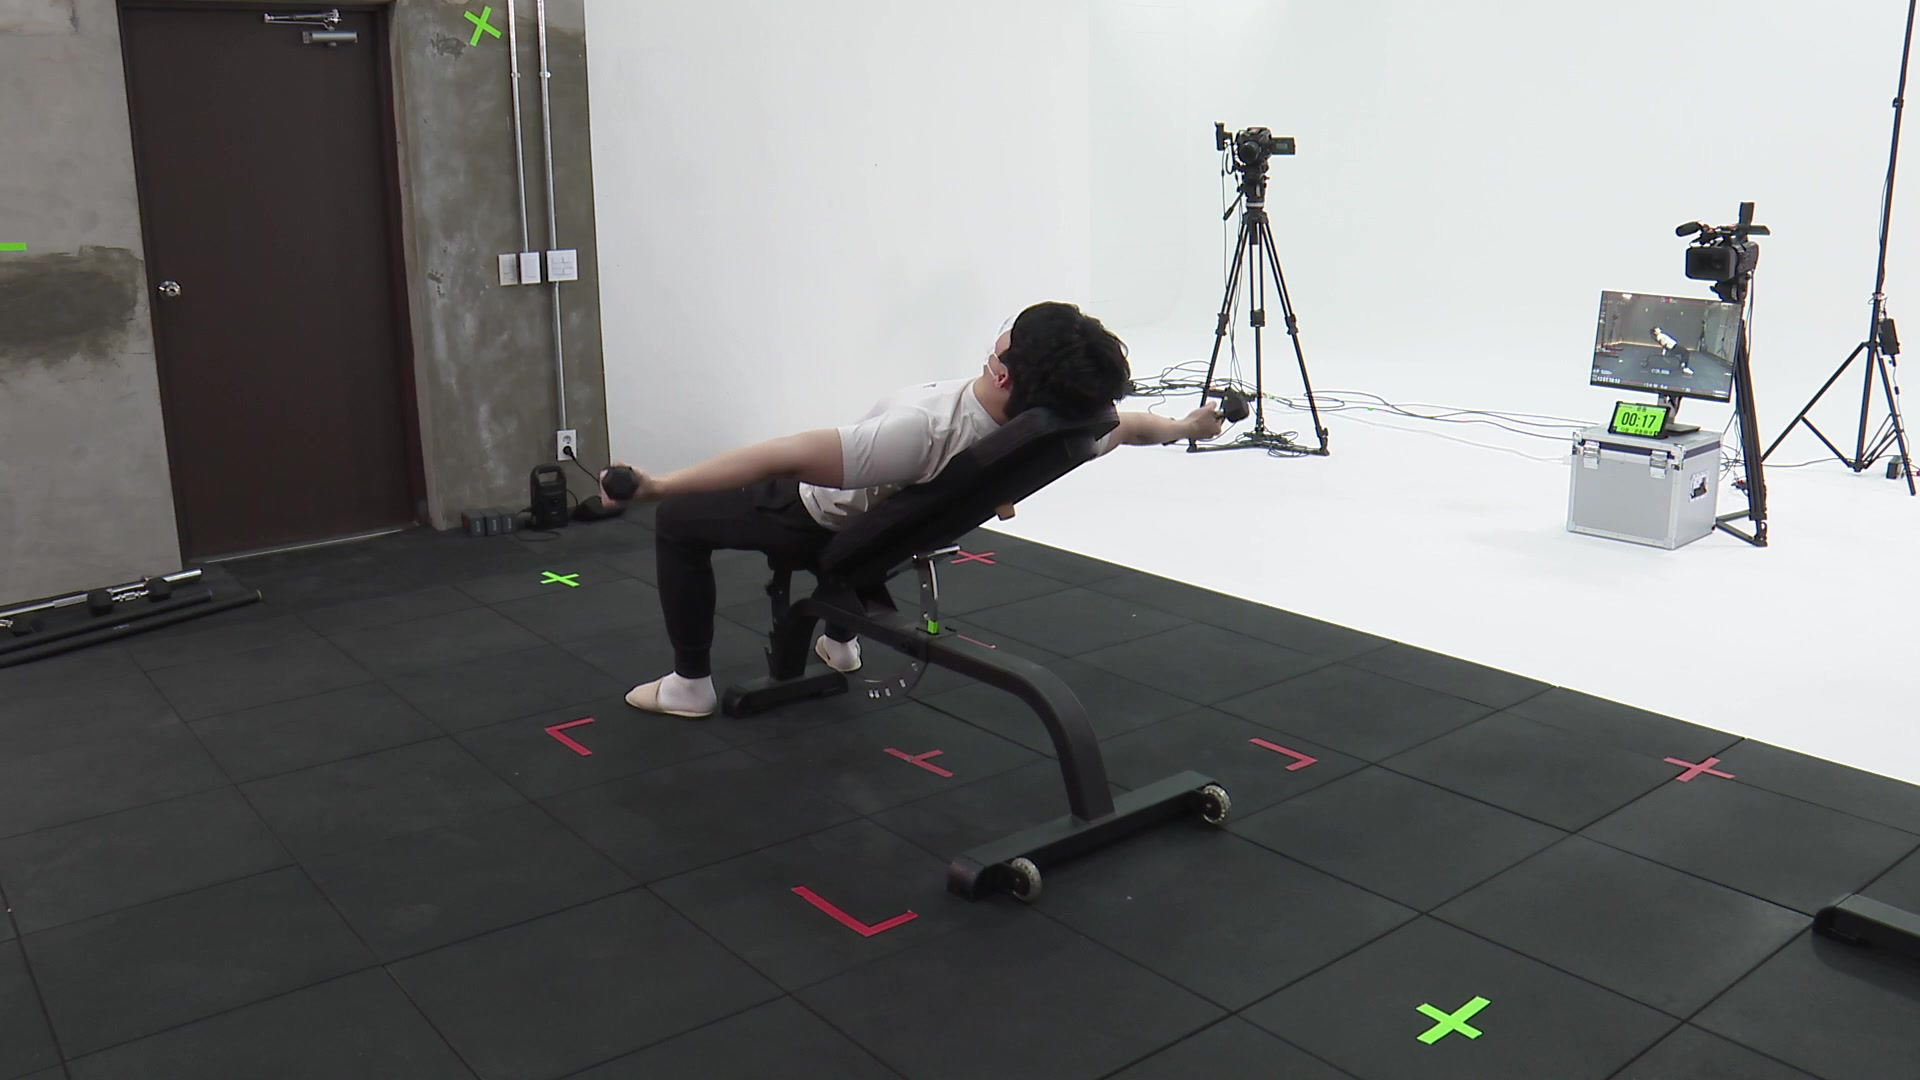

In [ ]:
from PIL import Image
df.iloc[lst, :]
image_id = df.iloc[4116, 0]
Image.open(os.path.join("../Keypoint/train_imgs/", image_id)).convert('RGB')

In [ ]:
device = torch.device('cpu') if config.gpu_id < 0 else torch.device('cuda:%d' % config.gpu_id)

model = get_model(config).to(device)
d = torch.load("./keypoint-rcnn-e20-bs8-albu.pth", map_location=torch.device("cpu"))


model.load_state_dict(d["model"])
# model.eval()
# with torch.no_grad():
#   for i in range(1):
#     preds = model([image[i].to(device)])
#     print(preds[0]['keypoints'].cpu().detach().numpy())

<All keys matched successfully>

In [ ]:
images = next(iter(test_loader))

8

In [ ]:
images = [images[idx].to(device) for idx in range(images.size()[0])]

In [ ]:
model.eval()
with torch.no_grad():
  preds = model(images)

In [ ]:
keypoints = preds[7]["keypoints"].cpu().detach().numpy()[0]

In [ ]:
images[0].size()

torch.Size([3, 224, 224])

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,10))

for i in range(7):
  plt.imshow(images[i].cpu().detach().permute(2, 1, 0))
  plt.show()

In [ ]:
keypoints[:, 1] * (224 / 1920)(1920/ 224)

array([13.734579, 13.474084, 13.474084, 13.57177 , 13.506645, 13.40896 ,
       13.474084, 13.115902, 13.115902, 13.441522, 13.24615 , 12.627472,
       12.627472,  9.924828, 11.618051, 10.543505, 10.152761, 13.539208,
       12.953093, 13.24615 , 13.24615 , 12.887968,  9.924828, 10.120199],
      dtype=float32)

In [ ]:
import cv2

image = cv2.imread(os.path.join("../Keypoint/test_imgs/", df.iloc[0, 0]))
image = cv2.resize(image, (224, 224))
image = image / 255.0
image = image.transpose(2, 0, 1)
image = [torch.as_tensor(image, dtype=torch.float32).to(device)]


In [ ]:
model.eval()
with torch.no_grad():
  pred = model(image)

In [ ]:
pred

[{'boxes': tensor([], device='cuda:0', size=(0, 4)),
  'keypoints': tensor([], device='cuda:0', size=(0, 24, 3)),
  'keypoints_scores': tensor([], device='cuda:0', size=(0, 24)),
  'labels': tensor([], device='cuda:0', dtype=torch.int64),
  'scores': tensor([], device='cuda:0')}]

In [ ]:
keypoints = preds[7]["keypoints"].detach().numpy()[0]

#기존 모델

In [ ]:
device = torch.device('cpu') if config.gpu_id < 0 else torch.device('cuda:%d' % config.gpu_id)

train_loader, valid_loader = get_loader(config)

print("Train:", len(train_loader.dataset))
print("Valid:", len(valid_loader.dataset))

model = get_model(config).to(device)
optimizer = optim.Adam(model.parameters())
crit = nn.MSELoss()

if config.verbose >= 2:
    # print(model)
    print(optimizer)
    print(crit)

trainer = Trainer(config)
trainer.train(model, crit, optimizer, train_loader, valid_loader)

Train: 3356
Valid: 839
Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
)
MSELoss()


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:446: UserWarning: Using a target size (torch.Size([8, 48])) that is different to the input size (torch.Size([384])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
Current run is terminating due to exception: The size of tensor a (384) must match the size of tensor b (48) at non-singleton dimension 1
Engine run is terminating due to exception: The size of tensor a (384) must match the size of tensor b (48) at non-singleton dimension 1


RuntimeError: ignored

In [ ]:
x, y = next(iter(train_loader))

In [ ]:
pred = model(x.to(device))

In [ ]:
pred.size()

torch.Size([8, 48])

In [ ]:
y.view(-1).size()

torch.Size([384])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


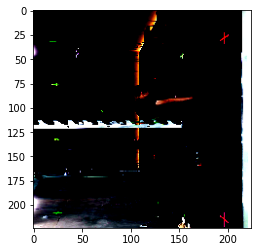

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(images[5].cpu().permute(2, 1, 0))


In [ ]:
import os
from os.path import exists, join, basename, splitext

git_repo_url = 'https://github.com/lxy5513/hrnet.git'
project_name = splitext(basename(git_repo_url))[0]
if not exists(project_name):
  # clone and install dependencies
  !git clone -q {git_repo_url}
  #!cd {project_name} && pip install -q -r requirements.txt
  !pip install -q youtube-dl EasyDict==1.7 Cython pyyaml json_tricks scikit-image yacs>=0.1.5 ipdb
  !cd {project_name}/lib && make
  
import sys
sys.path.append(project_name)
sys.path.append(join(project_name, 'tools'))
sys.path.append(join(project_name, 'lib'))
import time
import matplotlib
import matplotlib.pylab as plt
plt.rcParams["axes.grid"] = False

from IPython.display import YouTubeVideo

ERROR: jupyter-console 5.2.0 has requirement prompt-toolkit<2.0.0,>=1.0.0, but you'll have prompt-toolkit 3.0.17 which is incompatible.
ERROR: google-colab 1.0.0 has requirement ipython~=5.5.0, but you'll have ipython 7.21.0 which is incompatible.
cd nms; python setup_linux.py build_ext --inplace; rm -rf build; cd ../../
running build_ext
cythoning cpu_nms.pyx to cpu_nms.c
/usr/local/lib/python3.7/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/drive/My Drive/Colab Notebooks/hrnet/lib/nms/cpu_nms.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
skipping 'gpu_nms.cpp' Cython extension (up-to-date)
building 'cpu_nms' extension
creating build
creating build/temp.linux-x86_64-3.7
x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fdebug-prefix-map=/build/python3.7-a56wZI/python3.7-3.7.10=. -fstack-protector-str

In [ ]:
def download_from_google_drive(file_id, file_name):
  # download a file from the Google Drive link
  !rm -f ./cookie
  !curl -c ./cookie -s -L "https://drive.google.com/uc?export=download&id={file_id}" > /dev/null
  confirm_text = !awk '/download/ {print $NF}' ./cookie
  confirm_text = confirm_text[0]
  !curl -Lb ./cookie "https://drive.google.com/uc?export=download&confirm={confirm_text}&id={file_id}" -o {file_name}
  

pretrained_model_parent_directory = 'models/pytorch/pose_coco'
pretrained_model_path = join(project_name, pretrained_model_parent_directory, 'pose_hrnet_w48_256x192.pth')
if not exists(pretrained_model_path):
  # download the pretrained model
  !rm -rf {project_name}/models
  !mkdir -p {project_name}/{pretrained_model_parent_directory}
  download_from_google_drive('15T2XqPjW7Ex0uyC1miGVYUv7ULOxIyJI', pretrained_model_path)
  
yolo_pretrained_model_path = join(project_name, 'lib/detector/yolo/yolov3.weights')
if not exists(yolo_pretrained_model_path):
  # download the YOLO weights
  !cd {project_name}/lib/detector/yolo/ && wget -q https://pjreddie.com/media/files/yolov3.weights

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   408    0   408    0     0   2518      0 --:--:-- --:--:-- --:--:--  2518
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  243M    0  243M    0     0  56.0M      0 --:--:--  0:00:04 --:--:-- 70.4M


In [ ]:
!pwd

/content/drive/MyDrive/Colab Notebooks


In [ ]:
from hrnet.lib import models

In [ ]:
import cv2
import numpy as np
# from utilitys import plot_keypoint, PreProcess
# from hrnet.lib.core.inference import get_final_preds
import torch
import config
import models
from config import cfg, update_config
from types import SimpleNamespace


update_config(cfg,
              SimpleNamespace(cfg = join(project_name, 'experiments/coco/hrnet/w48_256x192_adam_lr1e-3.yaml'),
                              opts = '',
                              modelDir='', logDir='', dataDir='', prevModelDir=''))

def model_load(config):
  model = models.pose_hrnet.get_pose_net(config, is_train=False)
  model_file_name  = join(project_name, 'models/pytorch/pose_coco/pose_hrnet_w48_256x192.pth')
  state_dict = torch.load(model_file_name)
  from collections import OrderedDict
  new_state_dict = OrderedDict()
  for k, v in state_dict.items():
      name = k # remove module.
      #  print(name,'\t')
      new_state_dict[name] = v
  model.load_state_dict(new_state_dict)
  model.eval()
  return model

In [ ]:
model = models.pose_hrnet.get_pose_net(config, is_train=False)

AttributeError: ignored

In [ ]:
model = model_load(cfg)

In [ ]:
model.eval()
model(image[0])

RuntimeError: ignored

In [ ]:
YOUTUBE_ID = 'RXABo9hm8B8'


YouTubeVideo(YOUTUBE_ID)
!rm -df youtube.mp4
# download the youtube with the given ID
!youtube-dl -f 'bestvideo[ext=mp4]' --output "youtube.%(ext)s" https://www.youtube.com/watch?v=$YOUTUBE_ID
# cut the first 5 seconds
!ffmpeg -y -loglevel info -i youtube.mp4 -t 5 video.mp4

In [ ]:
import cv2
import numpy as np
from tools.utilitys import plot_keypoint, PreProcess
from lib.core.inference import get_final_preds
import torch
import config
import models
from config import cfg, update_config
from types import SimpleNamespace


ModuleNotFoundError: ignored